# Librerías y funciones

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import gdal
import random
from osgeo import gdal_array
from sklearn.feature_extraction import image
import itertools, random
import tensorflow as tf
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score,precision_score, recall_score
from tensorflow import keras
from keras.layers.core import Dropout
from keras.regularizers import L1L2
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import KFold
import keras.backend as K
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def plot_muestras(X, Y,Y_predd = np.array([[0,0]]), since = 0,until = 5, with_context = False):
  fig, axes = plt.subplots(nrows=2, ncols=5 , figsize=(40,10))
  axes = axes.flat
  cont = 0
  if Y_predd[0,0] == 0:
    for i in range(since,until):
      a = i
      if i >= 5:
          a = cont
          cont += 1
        #sns.despine(left=True)
      g = np.expand_dims(Y[i],axis = 0) # muestra Y[i] de dim :(2) --> dim : (1,2)
      T = np.concatenate((X[i,:,0:2],g)) # Concatena X[i][:,0:2] de dim : (10,2) con Y[i] de dim (1,2), quedando dim (11,2)
      XY = [0,0,0,0,0,0,0,0,0,0,1] # Vector que indica si el punto corresponde a X o Y.

      G = pd.DataFrame(list(zip(T[:,0],T[:,1],XY)), columns = ['x','y','Pred'])
      #Trayectoria  N°i del DataSet generado
      lat = T[:,0]
      lon = T[:,1]

      sns.scatterplot(x='x', y='y', hue = 'Pred', data= G,ax=axes[a])
      axes[a].set_title("Muestra {}".format(i), fontsize = 10, fontweight = "bold")
      axes[a].tick_params(labelsize = 6)
      axes[a].set_xlabel("")

      sns.scatterplot(x='x', y='y', hue = 'Pred', data= G,ax=axes[a+5])
      axes[a+5].set_title("Muestra {}".format(i), fontsize = 10, fontweight = "bold")
      axes[a+5].tick_params(labelsize = 10)
      axes[a+5].set_xlim(0,1)
      axes[a+5].set_ylim(0,1)
      axes[a+5].set_xlabel("")
  else:
    from sklearn.metrics import mean_squared_error
    max_x = df['x'].max()
    min_x = df['x'].min()
    max_y = df['y'].max()
    min_y = df['y'].min()
    range_X = max_x-min_x
    range_Y = max_y - min_y

    for i in range(since,until):
      a = i
      if i >= 5:
          a = cont
          cont += 1
        #sns.despine(left=True)
      g = np.expand_dims(Y[i],axis = 0) # muestra Y[i] de dim :(2) --> dim : (1,2)
      g2 = np.expand_dims(Y_predd[i],axis = 0)
      T1 = np.concatenate((X[i,:,0:2],g)) # Concatena X[i][:,0:2] de dim : (10,2) con Y[i] de dim (1,2), quedando dim (11,2)
      T = np.concatenate((T1,g2)) # dim (12,2)
      XY = [0,0,0,0,0,0,0,0,0,0,'True','Pred'] # Vector que indica si el punto corresponde a X o Y_true o Y_pred

      G = pd.DataFrame(list(zip(T[:,0],T[:,1],XY)), columns = ['x','y','Pred'])
      y_true = G.iloc[10,0:2]
      y_pred = G.iloc[11,0:2]
   
      y_real_true = [y_true['x']*range_X + min_x , y_true['y']*range_Y + min_y]
      y_real_pred = [y_pred['x']*range_X + min_x , y_pred['y']*range_Y + min_y]

      MSE = mean_squared_error(y_true,y_pred)
      REAL_MSE = mean_squared_error(y_real_true,y_real_pred)
      REAL_RMSE = (REAL_MSE)**0.5

      
      #Trayectoria  N°i del DataSet generado
      lat = T[:,0]
      lon = T[:,1]

      sns.scatterplot(x='x', y='y', hue = 'Pred', data= G,ax=axes[a])
      axes[a].set_title("MUESTRA {}, MSE {}, REAL MSE {}, REAL_RMSE {} ".format(i,round(MSE,7),round(REAL_MSE,3),round(REAL_RMSE,3)), fontsize = 10, fontweight = "bold")
      #if with_context == True:
      #  axes[a].set_xlim(0,1)
      #  axes[a].set_ylim(0,1)
      #else:
      #  pass
      axes[a].tick_params(labelsize = 10)
      axes[a].set_xlabel("")
      
      sns.scatterplot(x='x', y='y', hue = 'Pred', data= G,ax=axes[a+5])
      axes[a+5].set_title("MUESTRA {}, MSE {}, REAL MSE {}, REAL_RMSE {} ".format(i,round(MSE,7),round(REAL_MSE,3),round(REAL_RMSE,3)), fontsize = 10, fontweight = "bold")
     
      axes[a+5].set_xlim(0,1)
      axes[a+5].set_ylim(0,1)
     
      axes[a+5].tick_params(labelsize = 10)
      axes[a+5].set_xlabel("")


In [ ]:
def plot(history,scale = 1) : 
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = ((14, 2)))

  
  loss = np.array(np.array(history.history['loss'])*scale).tolist()
  val_loss = np.array(np.array(history.history['val_loss'])*scale).tolist()

  ax = axs[0]
  min = np.min([np.min(loss),np.min(val_loss)])
  max = np.max([np.max(loss),np.max(val_loss)])

  ax.plot(loss, label='loss')
  ax.plot(val_loss, label = 'val_loss')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.set_ylim([min - 0.1 , max + 0.1])
  ax.legend(loc='lower right')
  plt.show()

In [ ]:
def plot_trayectorias(H):
  lat = H['x']
  lon = H['y']
  population = H['trip_id']

  palette = itertools.cycle(sns.color_palette())
  sns.set(style="white", palette=sns.color_palette(), color_codes=True)
  rs = np.random.RandomState(10)

  f, axes = plt.subplots( figsize=(10, 4), sharex=True)
  sns.despine(left=True)

  sns.scatterplot(x="x", y="y", hue="trip_id", data=H)

In [ ]:
#Reentrenamiento para selección de mejores batches
#parámetros: BATCH, rnn_tuner,  best_RNN, X_train, Y_train

def RETRAINING_BATCH_SELECT(tuner, best_PP,BATCH,X_train,y_train):
  best_hpsss = []
  cv = sklearn.model_selection.KFold(5,shuffle = True, random_state = 0)
  for i,hyperparameters in enumerate(best_PP):
    folds_top3 = []
    for train_indices, test_indices in cv.split(X_train):
        x_train__, x_val__ = X_train[train_indices], X_train[test_indices]
        y_train__, y_val__ = y_train[train_indices], y_train[test_indices]

        model_top3 = tuner.hypermodel.build(hyperparameters[0])
        
        history_top3 = model_top3.fit(x_train__, y_train__, validation_data = (x_val__,y_val__),epochs=5,callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],batch_size=BATCH[i], verbose = 0)

        loss = history_top3.history['val_loss'][-1]
        folds_top3.append(loss)
    mean = np.mean(folds_top3)
    best_hpsss.append((hyperparameters,mean,BATCH[i]))


  best_hpss = sorted(best_hpsss,reverse=True, key=lambda best_hpsss: best_hpsss[1])
  return best_hpss

In [ ]:
#Parámetros: best_hpss, rnn_tuner,  best_RNN, X_train, Y_train

def FINAL_MODEL(best_hpss, tuner, X_train, y_train,epoch = 20, c_v= 5):
  from sklearn.metrics import mean_squared_error
  import os
  borrarPantalla = lambda: os.system ("cls")
  best_batch = best_hpss[0][2]
  Model_save = []
  LOSS = []
  VAL_LOSS = []
  REAL_MSE_TRAIN = []
  REAL_MSE_VAL = []
  REAL_RMSE_TRAIN = []
  REAL_RMSE_VAL = []
  cv = sklearn.model_selection.KFold(c_v,shuffle = True, random_state = 0)
  for i in range(1): #Encontrar la mejor semilla aleatoria del modelo escogido, considerando los 5 folds del CV, para guardarla y calcular f1_score
    
    s = 1
    for train_indices, test_indices in cv.split(X_train):
        print('Fold {} iniciando'.format(s))
        x_train__, x_val__ = X_train[train_indices], X_train[test_indices]
        y_train__, y_val__ = y_train[train_indices], y_train[test_indices]
        model = tuner.hypermodel.build(best_hpss[0][0][0])
        history = model.fit(x_train__, y_train__, validation_data = (x_val__,y_val__),epochs=epoch,callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],batch_size=best_batch, verbose = 1)
        loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]

        LOSS.append(loss)
        VAL_LOSS.append(val_loss)
  
        y_pred_train = model.predict(x_train__)
        y_real_train = [y_train__[:,0]*range_X + min_x , y_train__[:,1]*range_Y + min_y]
        y_real_pred_train = [y_pred_train[:,0]*range_X + min_x , y_pred_train[:,1]*range_Y + min_y]
        real_mse_train = mean_squared_error(y_real_train,y_real_pred_train)

        y_pred_val = model.predict(x_val__)
        y_real_val = [y_val__[:,0]*range_X + min_x , y_val__[:,1]*range_Y + min_y]
        y_real_pred_val = [y_pred_val[:,0]*range_X + min_x , y_pred_val[:,1]*range_Y + min_y]
        real_mse_val = mean_squared_error(y_real_val,y_real_pred_val)

        real_rmse_train = real_mse_train**0.5
        real_rmse_val = real_mse_val**0.5

        REAL_MSE_TRAIN.append(real_mse_train)
        REAL_MSE_VAL.append(real_mse_val)
        REAL_RMSE_TRAIN.append(real_rmse_train)
        REAL_RMSE_VAL.append(real_rmse_val)

        Model_save.append((loss,val_loss, history,model,x_val__,y_val__,real_mse_train,real_mse_val,real_rmse_train,real_rmse_val))

        borrarPantalla()
        s += 1

        
    
  LOSS = np.array(LOSS)
  VAL_LOSS = np.array(VAL_LOSS)


  mean_train_PP = np.mean(LOSS)
  std_train_PP = np.std(LOSS)
  mean_val_PP = np.mean(VAL_LOSS)
  std_val_PP = np.std(VAL_LOSS)

  mean_train_realMSE = np.mean(REAL_MSE_TRAIN)
  std_train_realMSE = np.std(REAL_MSE_TRAIN)
  mean_val_realMSE = np.mean(REAL_MSE_VAL)
  std_val_realMSE =np.std(REAL_MSE_VAL)
  mean_train_realRMSE = np.mean(REAL_RMSE_TRAIN)
  std_train_realRMSE = np.std(REAL_RMSE_TRAIN)
  mean_val_realRMSE = np.mean(REAL_RMSE_VAL)
  std_val_realRMSE = np.std(REAL_RMSE_VAL)
  


  metrics = {'mean_train':mean_train_PP,
             'std_train':std_train_PP,
             'mean_val':mean_val_PP,
             'std_val':std_val_PP,
             'mean_train_realMSE':mean_train_realMSE,
             'std_train_realMSE':std_train_realMSE,
             'mean_val_realMSE':mean_val_realMSE,
             'std_val_realMSE':std_val_realMSE,
             'mean_train_realRMSE':mean_train_realRMSE,
             'std_train_realRMSE':std_train_realRMSE,
             'mean_val_realRMSE':mean_val_realRMSE,
             'std_val_realRMSE':std_val_realRMSE,
             }
  #print(metrics)

  Model_save_sorted = sorted(Model_save,reverse=False, key=lambda Model_CNN1_save: Model_save[1])
  Best_model_save = Model_save_sorted[0]
  return Best_model_save, metrics

In [ ]:
def generateTrainingExamples(df, time_steps=10, time_after=10,stride = 1):
    X, y = [], []

    for idx in df.trip_id.unique():
        trip_df = df[df.trip_id == idx]
        trip_df.index = range(len(trip_df))

        for i in range(0,len(trip_df) - time_steps - time_after + 1,stride):
            X.append(trip_df.loc[i:i+time_steps-1, ['x', 'y', 'speed', 'angle(rad)']].values)
            y.append(trip_df.loc[i+time_steps + time_after-1, ['x', 'y']].values)
    
    return np.array(X), np.array(y)

In [ ]:
for i in range(0,10,2):
  print(i)

0
2
4
6
8


In [ ]:
# Funcion de perdida para actividad opcional (se DEBE correr en una cpu)

def bivariate_loss_function_CPU(y_true, y_pred):
    # Extracting features
    mu = y_pred[:, :2]
    sigma_lon = keras.activations.softplus(y_pred[:, 2])
    sigma_lat = keras.activations.softplus(y_pred[:, 3])
    rho = keras.activations.tanh(y_pred[:, 4])

    # Building cov matrices
    covariance_matrix = tf.reshape(tf.transpose(tf.stack([sigma_lon ** 2, rho * sigma_lon * sigma_lat, rho * sigma_lon * sigma_lat, sigma_lat ** 2])), (-1, 2, 2))
    
    # Gaussian distribution
    chol = tf.linalg.cholesky(covariance_matrix)
    pdf = tfp.distributions.MultivariateNormalDiag(loc=mu, scale_diag=keras.activations.softplus(y_pred[:, 2:4]))

    return - tf.reduce_sum(pdf.log_prob(y_true))

# Exploración de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Tarea_2/tarea2ML_data.csv'
df = pd.read_csv(path)

In [ ]:
df.describe()

,Unnamed: 0,x,y,speed,angle(rad),trip_id
count,170469.000000,170469.000000,1.704690e+05,170469.000000,170469.000000,170469.000000
mean,462.666303,626157.011921,5.368324e+06,0.513446,5.326661,99.572262
std,311.893562,6833.700883,3.286099e+03,0.541105,1.554876,58.492497
min,0.000000,606901.829667,5.364164e+06,0.000022,0.000001,0.000000
25%,213.000000,623140.892903,5.365310e+06,0.068525,5.482511,48.000000
50%,426.000000,628728.138090,5.367528e+06,0.234371,5.865651,99.000000
75%,645.000000,631049.506045,5.371211e+06,0.955682,6.031480,151.000000
max,1587.000000,632899.827386,5.376020e+06,2.132160,6.283178,199.000000


In [ ]:
max_x = df['x'].max()
min_x = df['x'].min()
max_y = df['y'].max()
min_y = df['y'].min()
range_X = max_x-min_x
range_Y = max_y - min_y
print('min X: {}, max X: {},range X: {}'.format(round(min_x,3),round(max_x,3),round(max_x-min_x,3)))
print('min Y: {}, max Y: {},range Y: {}'.format(round(min_y,3),round(max_y,3),round(max_y-min_y,3)))

min X: 606901.83, max X: 632899.827,range X: 25997.998
min Y: 5364163.971, max Y: 5376020.48,range Y: 11856.509


In [ ]:
df.groupby(['trip_id']).size()

trip_id
0       682
1       729
2       597
3      1388
4       864
       ... 
195     704
196     695
197     949
198     934
199     975
Length: 200, dtype: int64

In [ ]:
df.trip_id.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df[df.columns[1:]].head()

,x,y,speed,angle(rad),trip_id
0,607995.471985,5.375178e+06,1.878211,6.044257,0
1,608104.406352,5.375149e+06,1.880482,6.054725,0
2,608216.825919,5.375129e+06,1.882286,6.068390,0
3,608328.359651,5.375107e+06,1.889186,6.084002,0
4,608443.304236,5.375087e+06,1.894361,6.099661,0


# Normalización MaxMinScaler previo a la Generación de DataFrame

In [ ]:
new_df = df[df.columns[1:]]
scaler = MinMaxScaler()
scaler.fit(new_df[new_df.columns[:-1]])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
df_norm = scaler.transform(new_df[new_df.columns[:-1]])
df_norm

array([[4.20664056e-02, 9.28932335e-01, 8.80894920e-01, 9.61974486e-01],
       [4.62565117e-02, 9.26471062e-01, 8.81959916e-01, 9.63640471e-01],
       [5.05806742e-02, 9.24796589e-01, 8.82805978e-01, 9.65815342e-01],
       ...,
       [9.24873490e-01, 4.14209430e-03, 6.37187031e-04, 9.85031324e-01],
       [9.24981402e-01, 4.52211164e-03, 5.81787196e-04, 9.85008329e-01],
       [9.25117857e-01, 4.13480692e-03, 7.92035353e-04, 9.84834099e-01]])

In [ ]:
df[df.columns[1:]].head()


,x,y,speed,angle(rad),trip_id
0,607995.471985,5.375178e+06,1.878211,6.044257,0
1,608104.406352,5.375149e+06,1.880482,6.054725,0
2,608216.825919,5.375129e+06,1.882286,6.068390,0
3,608328.359651,5.375107e+06,1.889186,6.084002,0
4,608443.304236,5.375087e+06,1.894361,6.099661,0


In [ ]:
trip_id = np.array(df['trip_id'].tolist())
ttrip_id = np.expand_dims(trip_id,axis = 1)
ttrip_id.shape,df_norm.shape


((170469, 1), (170469, 4))

In [ ]:
norm_array = np.concatenate((df_norm,ttrip_id),axis = 1)
norm_array

array([[4.20664056e-02, 9.28932335e-01, 8.80894920e-01, 9.61974486e-01,
        0.00000000e+00],
       [4.62565117e-02, 9.26471062e-01, 8.81959916e-01, 9.63640471e-01,
        0.00000000e+00],
       [5.05806742e-02, 9.24796589e-01, 8.82805978e-01, 9.65815342e-01,
        0.00000000e+00],
       ...,
       [9.24873490e-01, 4.14209430e-03, 6.37187031e-04, 9.85031324e-01,
        1.99000000e+02],
       [9.24981402e-01, 4.52211164e-03, 5.81787196e-04, 9.85008329e-01,
        1.99000000e+02],
       [9.25117857e-01, 4.13480692e-03, 7.92035353e-04, 9.84834099e-01,
        1.99000000e+02]])

In [ ]:
FINAL_NORM_df = pd.DataFrame(norm_array,columns = df.columns[1:])
FINAL_NORM_df.head()

,x,y,speed,angle(rad),trip_id
0,0.042066,0.928932,0.880895,0.961974,0.0
1,0.046257,0.926471,0.881960,0.963640,0.0
2,0.050581,0.924797,0.882806,0.965815,0.0
3,0.054871,0.922934,0.886042,0.968300,0.0
4,0.059292,0.921254,0.888469,0.970792,0.0


Gráfica de las trayectorias originales

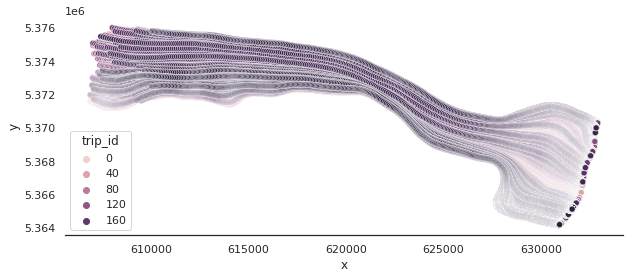

In [ ]:
plot_trayectorias(df)


Gráfica de las trayectorias normalizadas con MaxMinScaler

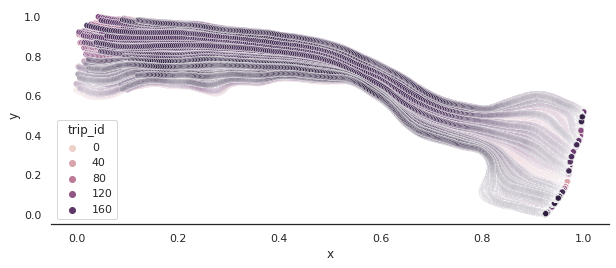

In [ ]:
plot_trayectorias(FINAL_NORM_df)


Generación Dataset 100%

In [ ]:
DF = generateTrainingExamples(FINAL_NORM_df, time_steps=10, time_after=10)

In [ ]:
X,Y = DF

In [ ]:
X.shape,Y.shape

((166669, 10, 4), (166669, 2))

In [ ]:
g = np.expand_dims(Y[0],axis = 0)
T = np.concatenate((X[0,:,0:2],g))

In [ ]:
T.shape

(11, 2)

Graficas de muestras del DataSet Generado

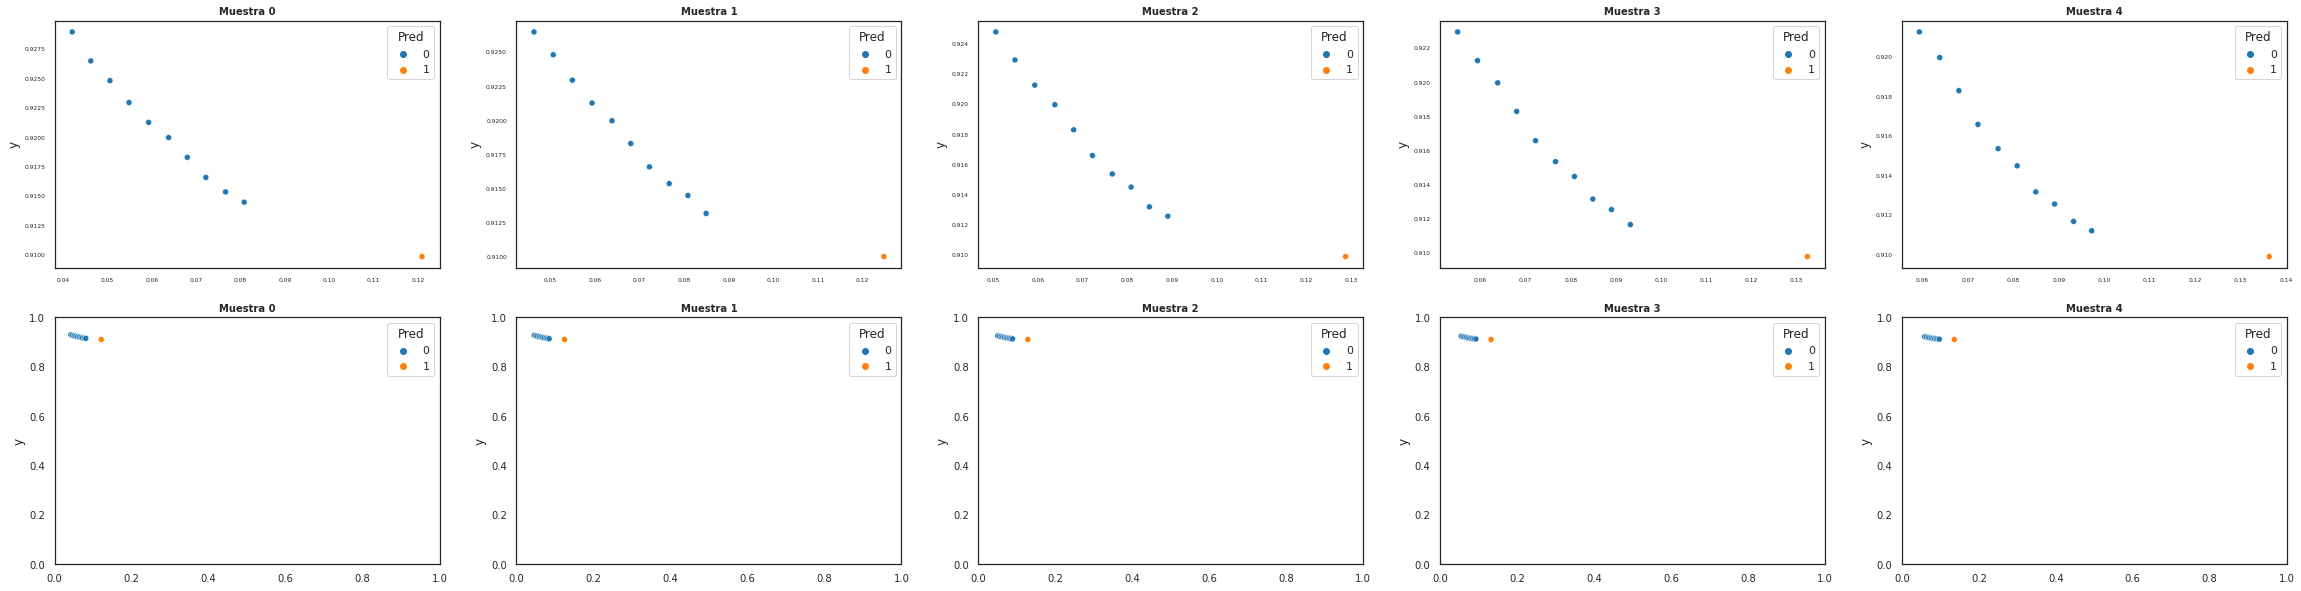

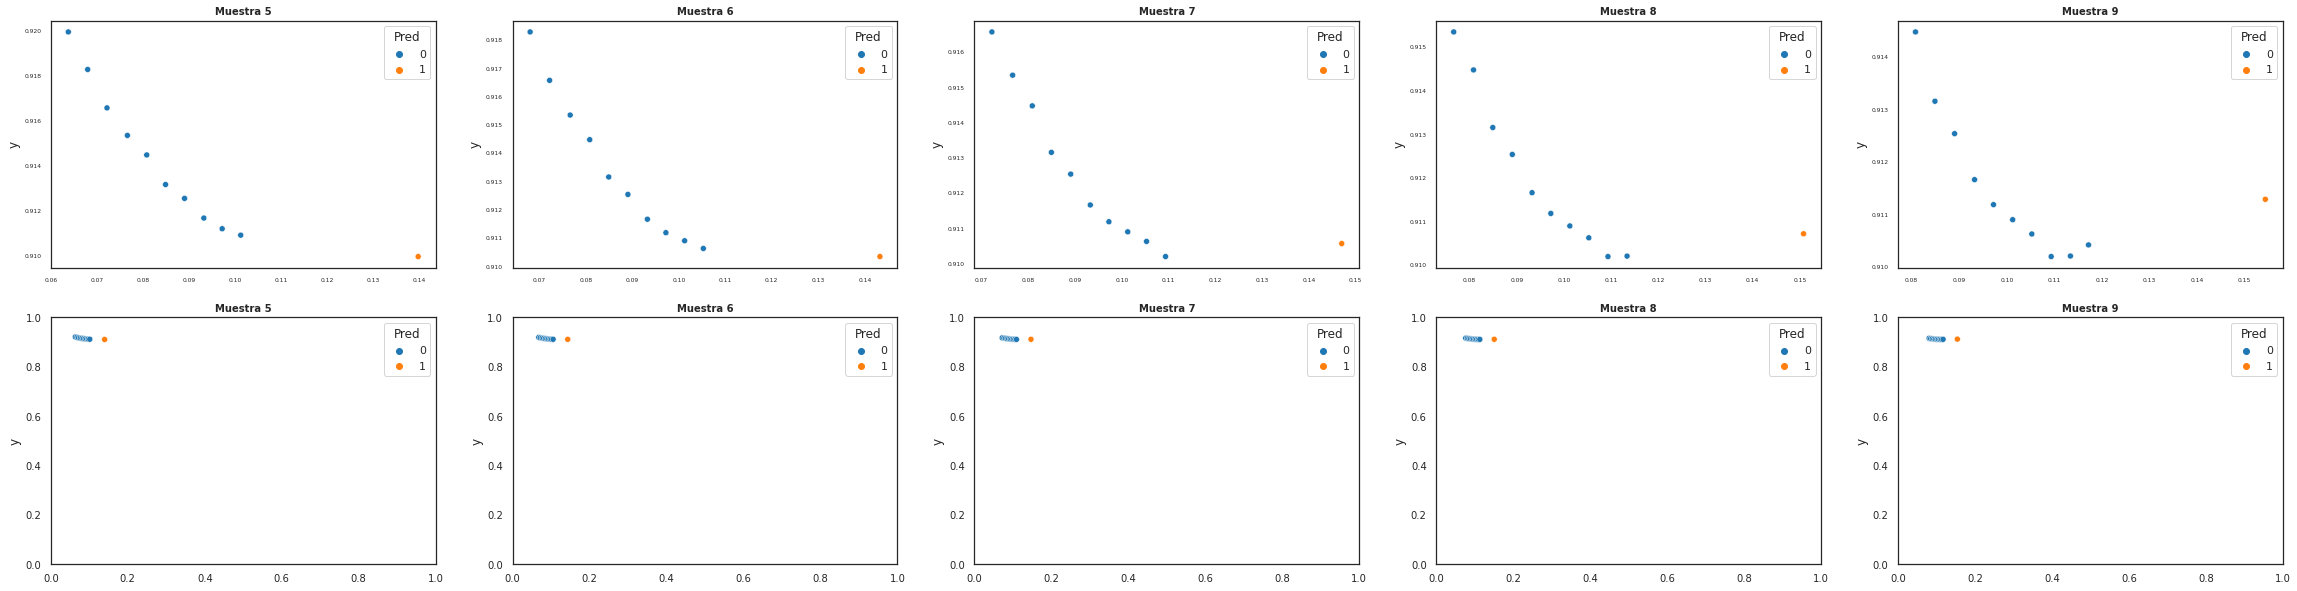

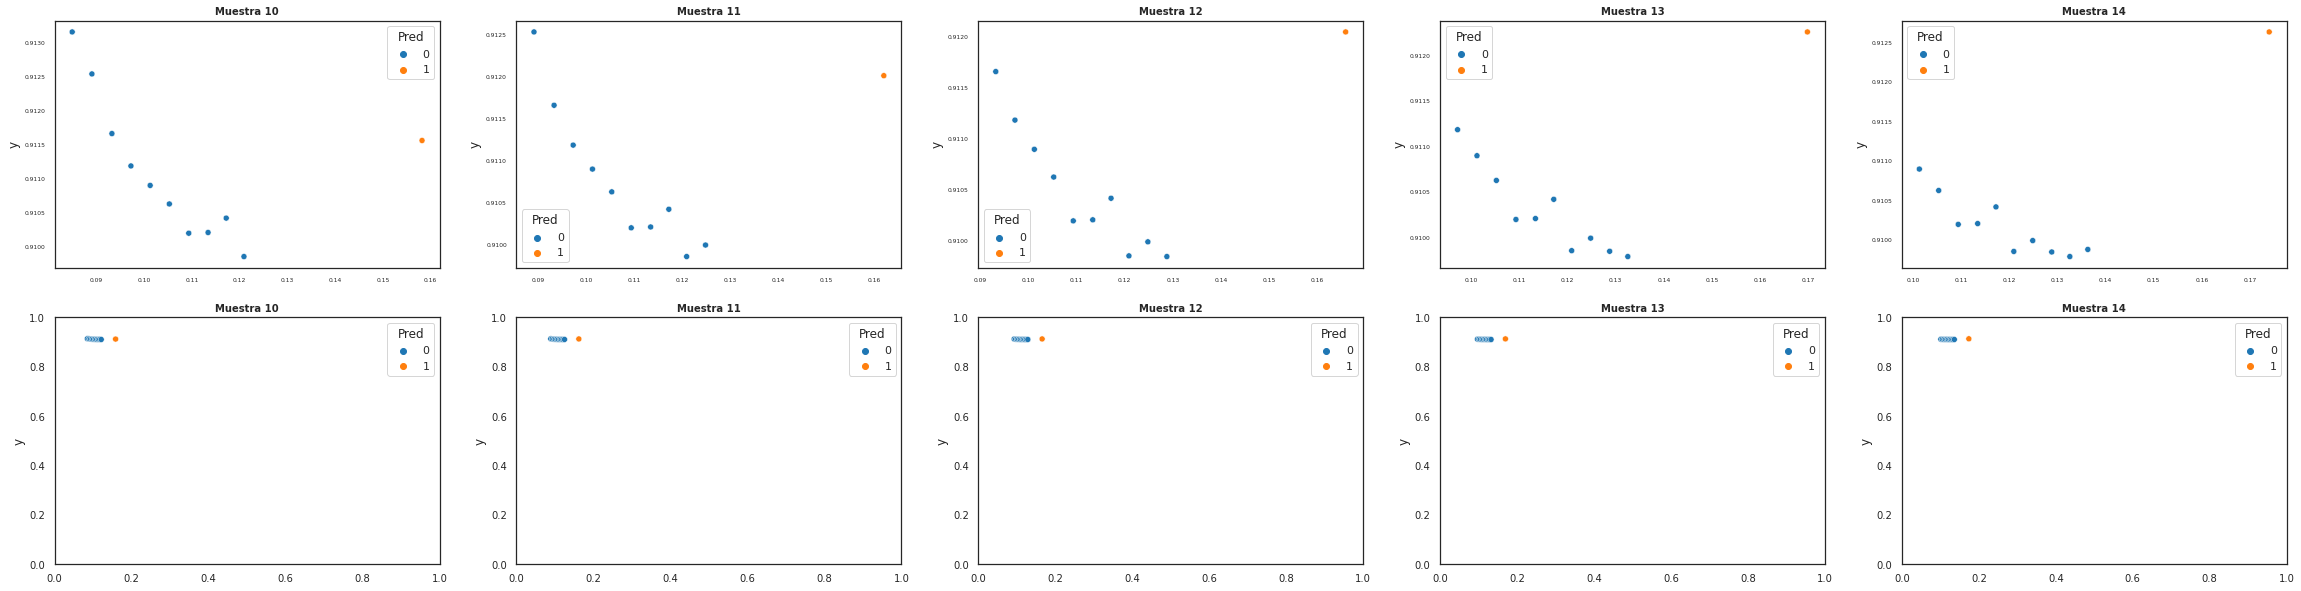

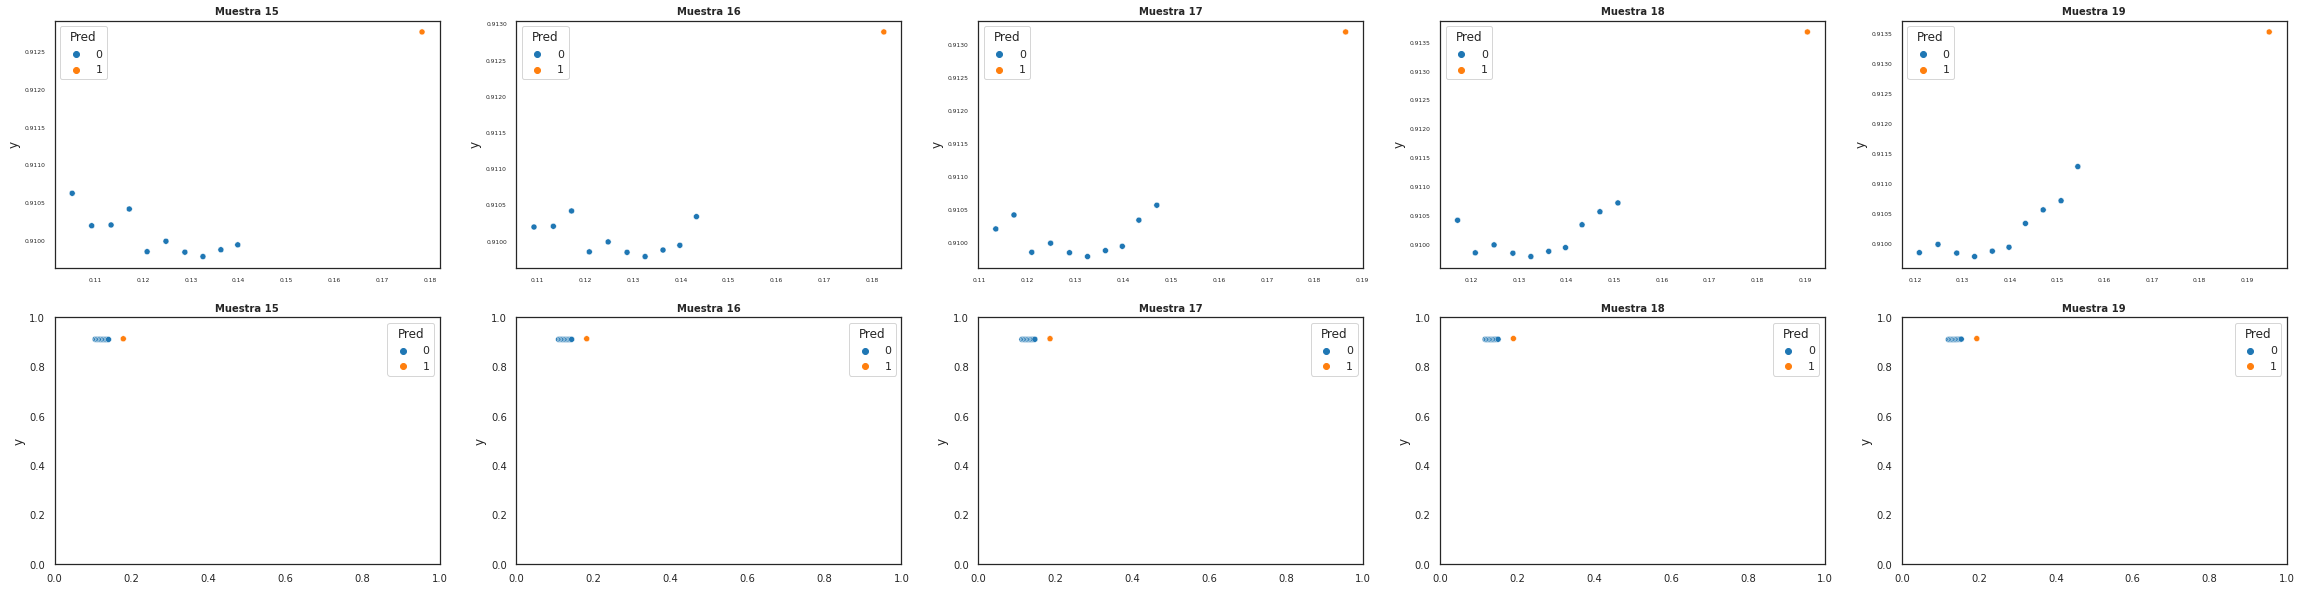

In [ ]:
for i in range (0,20,5):
 
  plot_muestras(X,Y,since=i,until = i + 5)

In [ ]:
X.shape, Y.shape

((166669, 10, 4), (166669, 2))

Para reducir el tiempo de cómputo, se utilizó una muestra representativa del DataSet generado, tomando solo el 5%, una vez se haya seleccionado el mejor modelo, se correrá con el DataSet 100%

In [ ]:
DF_2 = generateTrainingExamples(FINAL_NORM_df, time_steps=10, time_after=10,stride = 20) #stride 20 --> 5% de la muestra Original, new_shape(8419,10,4), original_shape(166669,10,4)

In [ ]:
X_reduce, Y_reduce = DF_2

In [ ]:
X_reduce.shape,Y_reduce.shape

((8419, 10, 4), (8419, 2))

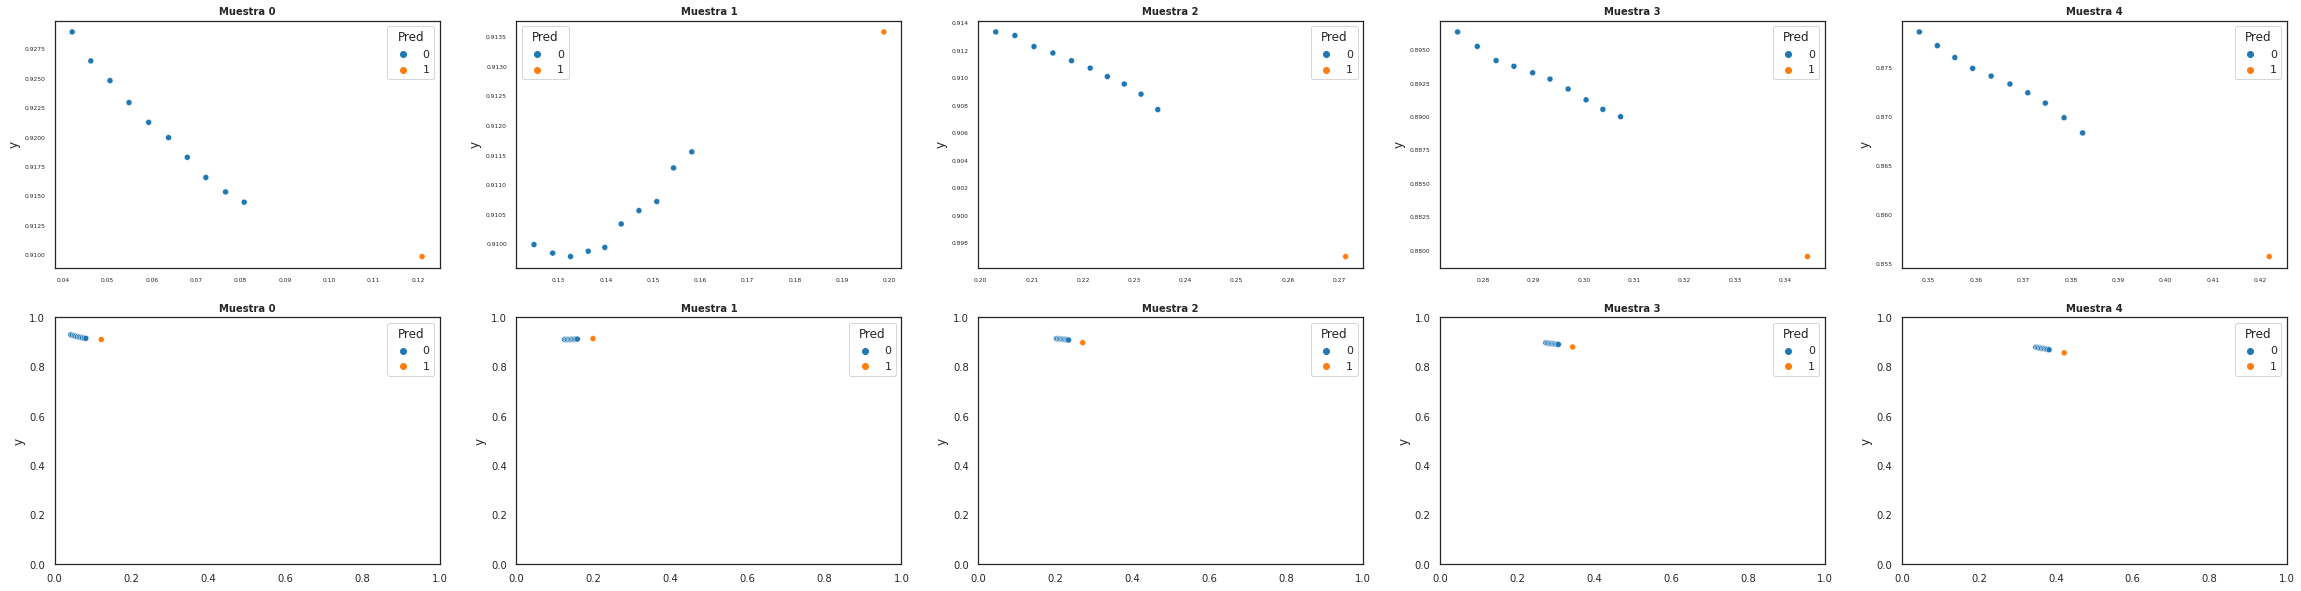

In [ ]:
plot_muestras(X_reduce,Y_reduce,since=0,until = 5)

# Separación set de entrenamiento y set de testeo

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reduce, Y_reduce, test_size=0.2, random_state=3,shuffle =True)
print(X_train.shape, X_test.shape, Y_train.shape ,Y_test.shape)

(6735, 10, 4) (1684, 10, 4) (6735, 2) (1684, 2)


In [ ]:
X_train_COMPLETE, X_test_COMPLETE, Y_train_COMPLETE, Y_test_COMPLETE = train_test_split(X, Y, test_size=0.2, random_state=3,shuffle =True)

# RNN simple ( a modo de prueba antes del tuning )

In [ ]:
#@tf.function
#def euclidean_distance(x, y):
#    a = tf.constant(2, shape=(), dtype=tf.float32, name='a') 
#    b = tf.constant(3, shape=(), dtype=tf.float32, name='b')
#    c = tf.constant(3, shape=(), dtype=tf.float32, name='c')
#    return  a*x**2 + b*x*y + c*y**2

In [ ]:
from tensorflow.keras import layers

In [ ]:
def lr_schedule(l_r):
  return tf.keras.optimizers.schedules.InverseTimeDecay(l_r, decay_steps=1*10, decay_rate=1)
def SGD(lr_schedulee):
  return tf.keras.optimizers.SGD(lr_schedulee)
def Adam1(lr_schedulee,a):
  return tf.keras.optimizers.Adam(lr_schedulee,clipnorm = a)

In [ ]:
# El modelo
#Adam 0.001 128 2 1 256 1024 0.00200323723256588
time_steps = 10
features = 4
embedding_dim = 128
hidden_units = 256
batch = 1024
epoch = 20
l_r = 0.001

inputs = keras.layers.Input(shape=(time_steps, features))    # <tf.Tensor 'Inputs:0' shape=(?, 10, 4) dtype=float32>
embedding = keras.layers.Dense(embedding_dim)(inputs)                       # <tf.Tensor 'dense_1/add:0' shape=(?, 10, 128) dtype=float32>

# Nos interesa que la red sea profunda, por lo que tomamos la salida en cada uno de los 10 pasos (return_sequences = True) para pasarsela a la siguiente capa.
lstm_1 = keras.layers.LSTM(hidden_units, return_sequences=True, name='lstm_1')(embedding)

# Conectamos el output anterior [None, 10, 256] a la entrada de la siguiente capa
lstm_2_sequence, lstm_2_state_h, lstm_2_state_c = keras.layers.LSTM(hidden_units, return_sequences=True, return_state=True, name='lstm_2')(lstm_1)

# Lo interesante, es que podemos hacer lo que nosotros queramos con este tensor ahora
# Por ejemplo, vamos a tomar solo el ultimo output y los estados y ponerlos en un solo vector
# OJO: Es muy importante que todas las operaciones sean capas de keras, sino el codigo no funcionara
last_lstm_output = keras.layers.Lambda(lambda x: x[:, -1, :])(lstm_2_sequence)
stacked_lstm_output = keras.layers.Concatenate()([last_lstm_output, lstm_2_state_h, lstm_2_state_c]) # <tf.Tensor 'Reshape:0' shape=(?, 768) dtype=float32>

# Y ahora podemos continuar con lo que queramos
output_layer_1 = keras.layers.Dense(128, activation='relu')(stacked_lstm_output)
#output_layer_2 = keras.layers.Dense(64, activation=None)(output_layer_1)
output_layer_3 = keras.layers.Dense(2, activation=None)(output_layer_1)

model = keras.models.Model(inputs=inputs, outputs=output_layer_3)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 10, 4)]      0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 10, 128)      640         input_6[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10, 256)      394240      dense_9[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 10, 256), (N 525312      lstm_1[0][0]                     
____________________________________________________________________________________________

In [ ]:

#l_r = 0.001
#batch = 1024
#epoch = 20
#timesteps = 10
#opt = Adam1(lr_schedulee = lr_schedule(l_r))

#model = keras.Sequential()

#model.add(layers.Embedding(input_dim = 4,output_dim=256,batch_input_shape = [4,None])) #Reducir dimensionalidad
#model.add(layers.Dense(embedding_dim,input_shape = (timesteps,features )))

#model.add(layers.LSTM(rnn_units))
#model.add(layers.LSTM(rnn_units,return_sequences = True))
#model.add(layers.LSTM(rnn_units))


#model.add(layers.LSTM(rnn_units,return_sequences=False)) # https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
#model.add(layers.Dense(2))

#model.summary()

In [ ]:
loss1 = tf.keras.losses.MeanSquaredError()
loss2 = tf.keras.losses.MeanAbsoluteError()
#loss_2 = euclidian_distance_tf()
Opt = Adam1(lr_schedulee = lr_schedule(l_r), a = 1) #a = clipnorm
model.compile(optimizer=Opt, loss=loss1)

In [ ]:

history = model.fit(X_train, Y_train, epochs=epoch, batch_size=batch,callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)],
                    verbose = 1, validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 11s 1s/step - loss: 0.1027 - val_loss: 0.0139
Epoch 2/20
6/6 [==============================] - 6s 1s/step - loss: 0.0100 - val_loss: 0.0075
Epoch 3/20
6/6 [==============================] - 6s 1s/step - loss: 0.0051 - val_loss: 0.0035
Epoch 4/20
6/6 [==============================] - 6s 1s/step - loss: 0.0025 - val_loss: 0.0021
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/20
6/6 [==============================] - 6s 1s/step - loss: 9.9876e-04 - val_loss: 8.3804e-04
Epoch 7/20
6/6 [==============================] - 6s 1s/step - loss: 6.8413e-04 - val_loss: 5.5532e-04
Epoch 8/20
6/6 [==============================] - 6s 1s/step - loss: 4.9224e-04 - val_loss: 4.6809e-04
Epoch 9/20
6/6 [==============================] - 6s 1s/step - loss: 3.9208e-04 - val_loss: 3.3064e-04
Epoch 10/20
6/6 [==============================] - 6s 1s/step - loss: 2.9964e-04 - val_loss: 2.7587e-04
Epoch 11

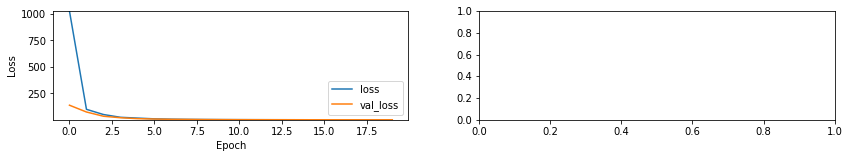

In [ ]:
plot(history = history,scale = 10000)

In [ ]:
history.history['loss'][-1]

0.00011036410433007404

In [ ]:
history.history['loss']

[0.10272490978240967,
 0.009992746636271477,
 0.005082001443952322,
 0.0024666411336511374,
 0.001707372604869306,
 0.000998760457150638,
 0.000684133090544492,
 0.0004922368098050356,
 0.00039208345697261393,
 0.00029963674023747444,
 0.00025113692390732467,
 0.00020651314116548747,
 0.00018226000247523189,
 0.000160487019456923,
 0.00014699820894747972,
 0.00013556299381889403,
 0.0001272529043490067,
 0.00012058039283147082,
 0.00011501333210617304,
 0.00011036410433007404]

In [ ]:
Y_predict = model.predict(X_train)

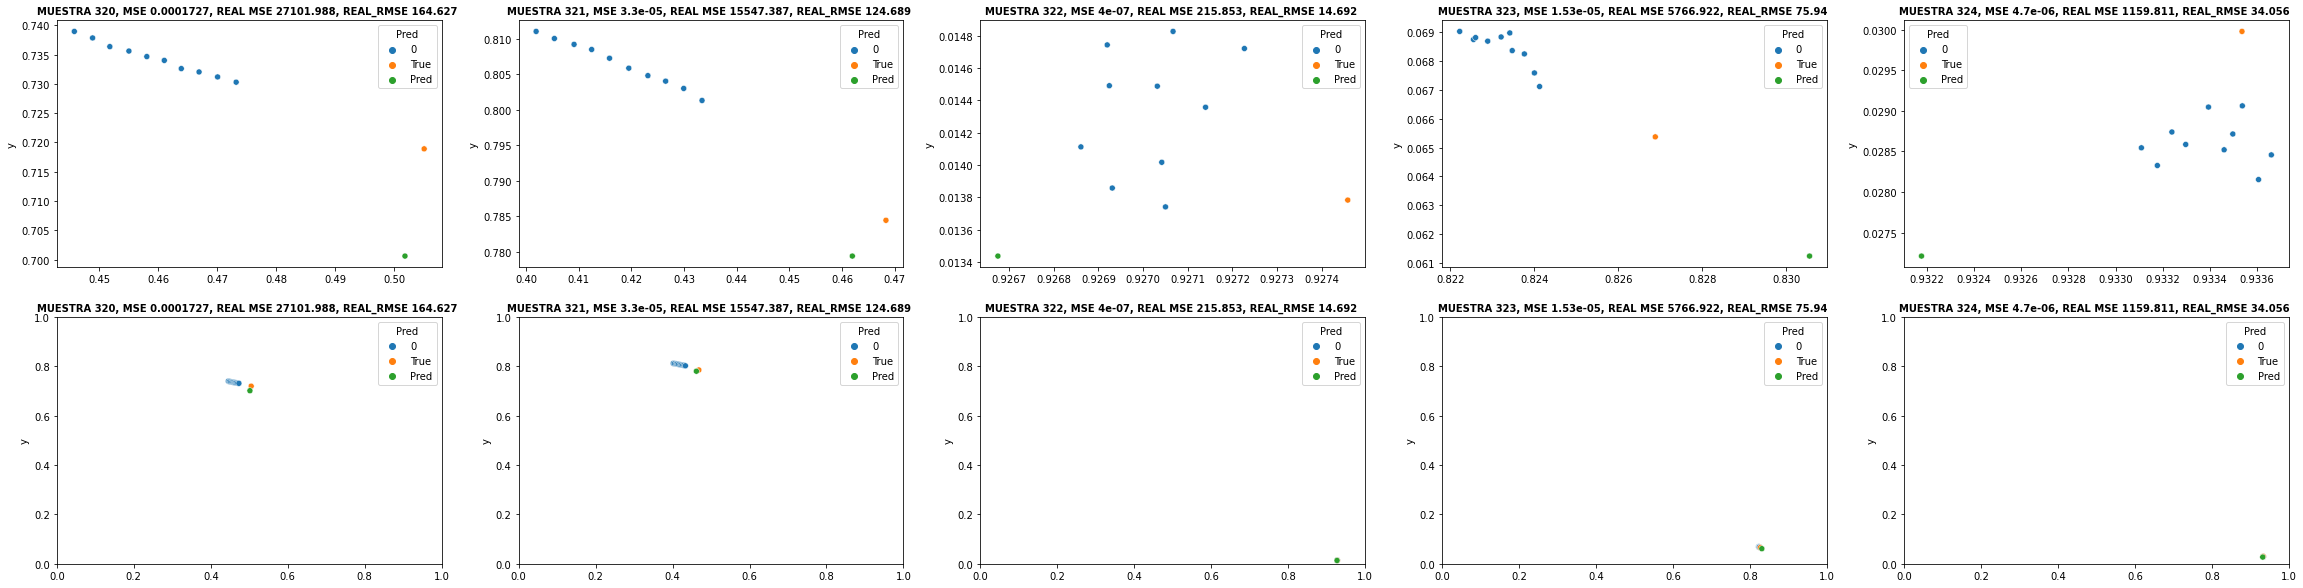

In [ ]:
plot_muestras(X_train,Y_train,Y_predict,since=320,until = 325) # Primera fila grafica muestras ajustadas al contexto dicha muestra, 
                                                                # Segunda fila grafica muestras ajustada al contexto general( entre 0 y 1 por la normalización)

In [ ]:
#def euclidian_distance_tf(x1,x2):
#  distance = 0.0
#  for i in range(len(x1)):
#    distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x1, x2))))
#    nd_distance=session.run(distance)
#    return nd_distance


# Hipermodelo RNN LSTM

In [ ]:
def RNN2_builder(hp):  

  timesteps = 10
  features = 4
  #L1: [0.1, 0.01, 0.001]
  #L2: [0.1, 0.01, 0.001]
  #Dropout : [0, 0.2, 0.5]
  #learning_rate: [0.00001,0.0001, 0.001, 0.01]
  #layers_LSTM: [1, 2]
  #Dense_Layers: [0,1,2]
  #optimizador: [Adam, SGD] 
  #embedding: [32, 64, 128]
  #rnn_units: [64, 128, 256]


  #Opciones de Hiperparámetros
  L_r = hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3, 1e-4])
  #do = hp.Choice('dropout',[0.0,0.2,0.5]) #Dropout_rate 
  #L1 = hp.Choice('L1',[0e-1,1e-1,1e-2,1e-3])  #Kernel_regularizers_L1 
  #L2 = hp.Choice('L2',[0e-1,1e-1,1e-2,1e-3])  #Kernel_regularizers_L2  
  Opt = hp.Choice('Optimizer',['Adam'])#,'SGD'])
  embedding_dim = hp.Choice('embedding_dim',[64,128,256])
  layers_LSTM = hp.Choice('layers_LSTM',[1])
  layers_Dense = hp.Choice('layers_Dense',[0])
  rnn_units = hp.Choice('rnn_units',[124,256])


  model = keras.Sequential()

  model.add(layers.Dense(embedding_dim,input_shape = (timesteps,features )))
  
  #LSTM layers
  if layers_LSTM == 2:
    model.add(layers.LSTM(rnn_units,return_sequences=True))
    model.add(layers.LSTM(rnn_units,return_sequences=False))
  else:
    model.add(layers.LSTM(rnn_units,return_sequences=False))

  
  #Dense layers
  for i in range(layers_Dense):
    if i == 0:
      model.add(layers.Dense(layers_Dense,activation='relu'))
    else:
      model.add(layers.Dense(layers_Dense))


  model.add(layers.Dense(2))

  if Opt == 'Adam': #Adam
    Optimizer = Adam1(lr_schedulee = lr_schedule(L_r),a=1)
  else: #SGD
    Optimizer = SGD(lr_schedulee= lr_schedule(L_r))
  
  model.compile(optimizer=Optimizer,
                  loss=loss1)
  return model
  

In [ ]:
def RNN_builder(hp):
  time_steps = 10
  features = 4


  L_r = hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3])
  #do = hp.Choice('dropout',[0.0,0.2,0.5]) #Dropout_rate 
  #L1 = hp.Choice('L1',[0e-1,1e-1,1e-2,1e-3])  #Kernel_regularizers_L1 
  #L2 = hp.Choice('L2',[0e-1,1e-1,1e-2,1e-3])  #Kernel_regularizers_L2  
  Opt = hp.Choice('Optimizer',['Adam'])#,'SGD'])
  embedding_dim = hp.Choice('embedding_dim',[64,128,256])
  layers_LSTM = hp.Choice('layers_LSTM',[2])
  layers_Dense = hp.Choice('layers_Dense',[1])
  rnn_units = hp.Choice('rnn_units',[124,256])


  inputs = keras.layers.Input(shape=(time_steps, features))    # <tf.Tensor 'Inputs:0' shape=(?, 10, 4) dtype=float32>
  embedding = keras.layers.Dense(embedding_dim)(inputs)                       # <tf.Tensor 'dense_1/add:0' shape=(?, 10, 128) dtype=float32>

  # Nos interesa que la red sea profunda, por lo que tomamos la salida en cada uno de los 10 pasos (return_sequences = True) para pasarsela a la siguiente capa.
  lstm_1 = keras.layers.LSTM(rnn_units, return_sequences=True, name='lstm_1')(embedding)

  # Conectamos el output anterior [None, 10, 256] a la entrada de la siguiente capa
  lstm_2_sequence, lstm_2_state_h, lstm_2_state_c = keras.layers.LSTM(rnn_units, return_sequences=True, return_state=True, name='lstm_2')(lstm_1)

  # Lo interesante, es que podemos hacer lo que nosotros queramos con este tensor ahora
  # Por ejemplo, vamos a tomar solo el ultimo output y los estados y ponerlos en un solo vector
  # OJO: Es muy importante que todas las operaciones sean capas de keras, sino el codigo no funcionara
  last_lstm_output = keras.layers.Lambda(lambda x: x[:, -1, :])(lstm_2_sequence)
  stacked_lstm_output = keras.layers.Concatenate()([last_lstm_output, lstm_2_state_h, lstm_2_state_c]) # <tf.Tensor 'Reshape:0' shape=(?, 768) dtype=float32>

  # Y ahora podemos continuar con lo que queramos
  output_layer_1 = keras.layers.Dense(128, activation='relu')(stacked_lstm_output)
  output_layer_2 = keras.layers.Dense(2, activation=None)(output_layer_1)

  model = keras.models.Model(inputs=inputs, outputs=output_layer_2)

  if Opt == 'Adam': #Adam
    Optimizer = Adam1(lr_schedulee = lr_schedule(L_r),a=1)#a : clipnorm
  else: #SGD
    Optimizer = SGD(lr_schedulee= lr_schedule(L_r))
  
  model.compile(optimizer=Optimizer,
                  loss=loss1)
  return model
  

# Kt.engine.Tuner.tuner, RNN

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 102kB 8.4MB/s 


In [ ]:
def hyperband():
   return kt.oracles.Hyperband(
    objective=kt.Objective("val_loss", direction="min"),
    max_epochs= 10,
    factor=5,
    hyperband_iterations=1,
    seed=None)  

def bayesian():
   return kt.oracles.BayesianOptimization(
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=20,
    seed = None)

def random():
   return kt.oracles.RandomSearch(
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=10,
    seed=None,
    hyperparameters=None,
    allow_new_entries=True,
    tune_new_entries=True,)

Hipertuning con CV, RNN

In [ ]:
class CVTuner(kt.engine.tuner.Tuner):

  def run_trial(self, trial, x, y, batch_size=32, epochs=1):
    cv = sklearn.model_selection.KFold(5,shuffle = True, random_state = 0)
    val_losses = []
    h = 0
    for train_indices, test_indices in cv.split(x):
        x_train, x_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
           
        model = self.hypermodel.build(trial.hyperparameters)

        model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 0)
        #y_pred = model.predict(x_test)
        loss = mean_squared_error(y_test,model.predict(x_test))
        K.clear_session()
        val_losses.append(loss)
        print("FOLD: {}, : val_loss: {}".format(h+1,loss))
        h+=1

    self.oracle.update_trial(trial.trial_id, {'val_loss': np.mean(val_losses)})
    self.save_model(trial.trial_id, model)
best_RNN = []

#with tf.device('cpu:0'):
for batch in [1024,2048,4096]:
  rnn_tuner = CVTuner(
  hypermodel= RNN_builder,
  oracle=hyperband(),
    directory='RNN_FINAL_{}'.format(batch+6),
    project_name = '1'
    )
  rnn_tuner.search(X_train, Y_train, batch_size=batch, epochs=5)
  best_RNN.append(rnn_tuner.get_best_hyperparameters(num_trials=1))


Trial 13 Complete [00h 01m 28s]
val_loss: 132.17546206793617

Best val_loss So Far: 0.011358889202483222
Total elapsed time: 00h 34m 23s
INFO:tensorflow:Oracle triggered exit


Reentrenamiento para obtener mejor batchsize

In [ ]:
BATCH_RNN = [1024,2048,4096]
best_hps = RETRAINING_BATCH_SELECT(rnn_tuner, best_RNN,BATCH_RNN,X_train,Y_train)

In [ ]:
#CROSSVALIDATION PARA LOS 3 BATCHSIZES
d = len(best_hps)
for i in range(d-1,d-4,-1):
  print(best_hps[i][0][0].get('Optimizer'),
        best_hps[i][0][0].get('learning_rate'),
        best_hps[i][0][0].get('embedding_dim'),
        best_hps[i][0][0].get('layers_LSTM'),
        best_hps[i][0][0].get('layers_Dense'),
        best_hps[i][0][0].get('rnn_units'),
        best_hps[i][2],
        best_hps[i][1]

  )


Adam 0.001 256 2 1 256 1024 0.001427986507769674
Adam 0.001 256 2 1 256 2048 0.007417816249653697
Adam 0.001 128 2 1 124 4096 0.018531004153192043


In [ ]:
best_hps_final = sorted(best_hps,reverse=False,key=lambda best_hps:best_hps[1])
best_hps_final

[([<keras_tuner.engine.hyperparameters.HyperParameters at 0x7fb74ebe8310>],
  0.001427986507769674,
  1024),
 ([<keras_tuner.engine.hyperparameters.HyperParameters at 0x7fb74e3ca590>],
  0.007417816249653697,
  2048),
 ([<keras_tuner.engine.hyperparameters.HyperParameters at 0x7fb750a0b690>],
  0.018531004153192043,
  4096)]

Reentrenamiento del modelo final escogido para obtener mejor semilla y métricas de rendimiento promedio

In [ ]:
final_model, final_metrics = FINAL_MODEL(best_hps_final, rnn_tuner, X_train, Y_train,epoch = 20, c_v = 5)

Fold 1 iniciando
Epoch 1/20
6/6 [==============================] - 12s 1s/step - loss: 0.1481 - val_loss: 0.0483
Epoch 2/20
6/6 [==============================] - 7s 1s/step - loss: 0.0230 - val_loss: 0.0133
Epoch 3/20
6/6 [==============================] - 7s 1s/step - loss: 0.0087 - val_loss: 0.0081
Epoch 4/20
6/6 [==============================] - 7s 1s/step - loss: 0.0052 - val_loss: 0.0045
Epoch 5/20
6/6 [==============================] - 7s 1s/step - loss: 0.0031 - val_loss: 0.0019
Epoch 6/20
6/6 [==============================] - 7s 1s/step - loss: 0.0019 - val_loss: 9.4554e-04
Epoch 7/20
6/6 [==============================] - 7s 1s/step - loss: 8.7286e-04 - val_loss: 9.0039e-04
Epoch 8/20
6/6 [==============================] - 7s 1s/step - loss: 6.6989e-04 - val_loss: 4.8190e-04
Epoch 9/20
6/6 [==============================] - 7s 1s/step - loss: 5.0660e-04 - val_loss: 3.4836e-04
Epoch 10/20
6/6 [==============================] - 7s 1s/step - loss: 3.3864e-04 - val_loss: 3.1632

In [ ]:
print(final_model[0])
print(final_model[1])
print(final_model[2])
print(final_model[3])
print(final_model[4].shape)
print(final_model[5].shape)
for i in final_metrics:
  print( "{} : {}".format(i,final_metrics[i]))


0.00012493078247644007
0.00012118462473154068
(1347, 10, 4)
(1347, 2)
mean_train : 0.00013018945610383527
std_train : 3.63542305649554e-05
mean_val : 0.00012594810250448062
std_val : 3.983333954174246e-05
mean_train_realMSE : 139381944.59705693
std_train_realMSE : 572343.3034879462
mean_val_realMSE : 139409678.61368716
std_val_realMSE : 1737603.8960270442
mean_train_realRMSE : 11805.988231205341
std_train_realRMSE : 24.217384208217226
mean_val_realRMSE : 11806.956746137086
std_val_realRMSE : 73.83094564679104


Mejor semilla

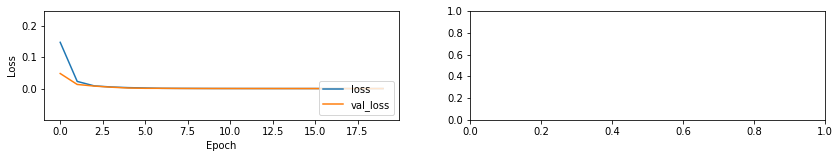

In [ ]:
rnn1_model = final_model[3]
history = final_model[2]
#y_pred_rnn =predict(rnn1_model,final_model[5])
#K.clear_session()

plot(history = history)

In [ ]:
history.history['val_loss'][-1]

0.00012118462473154068

In [ ]:
Y_predict_rnn = rnn1_model.predict(X_train)

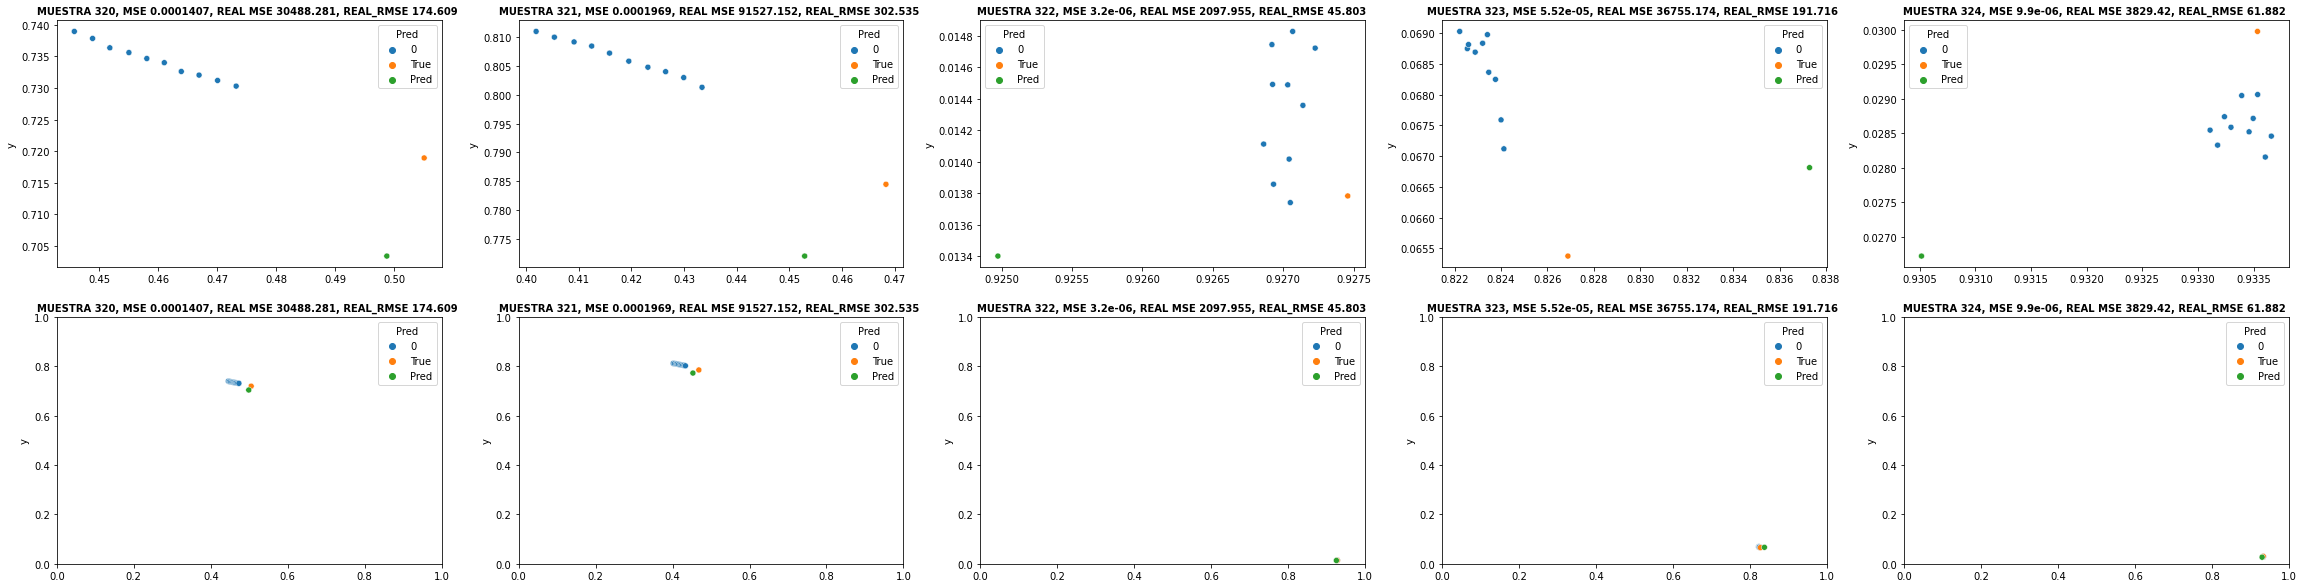

In [ ]:

plot_muestras(X_train,Y_train,Y_predict_rnn,since=320,until = 325)

#Test RNN

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Y_predict_rnn_test = rnn1_model.predict(X_test)

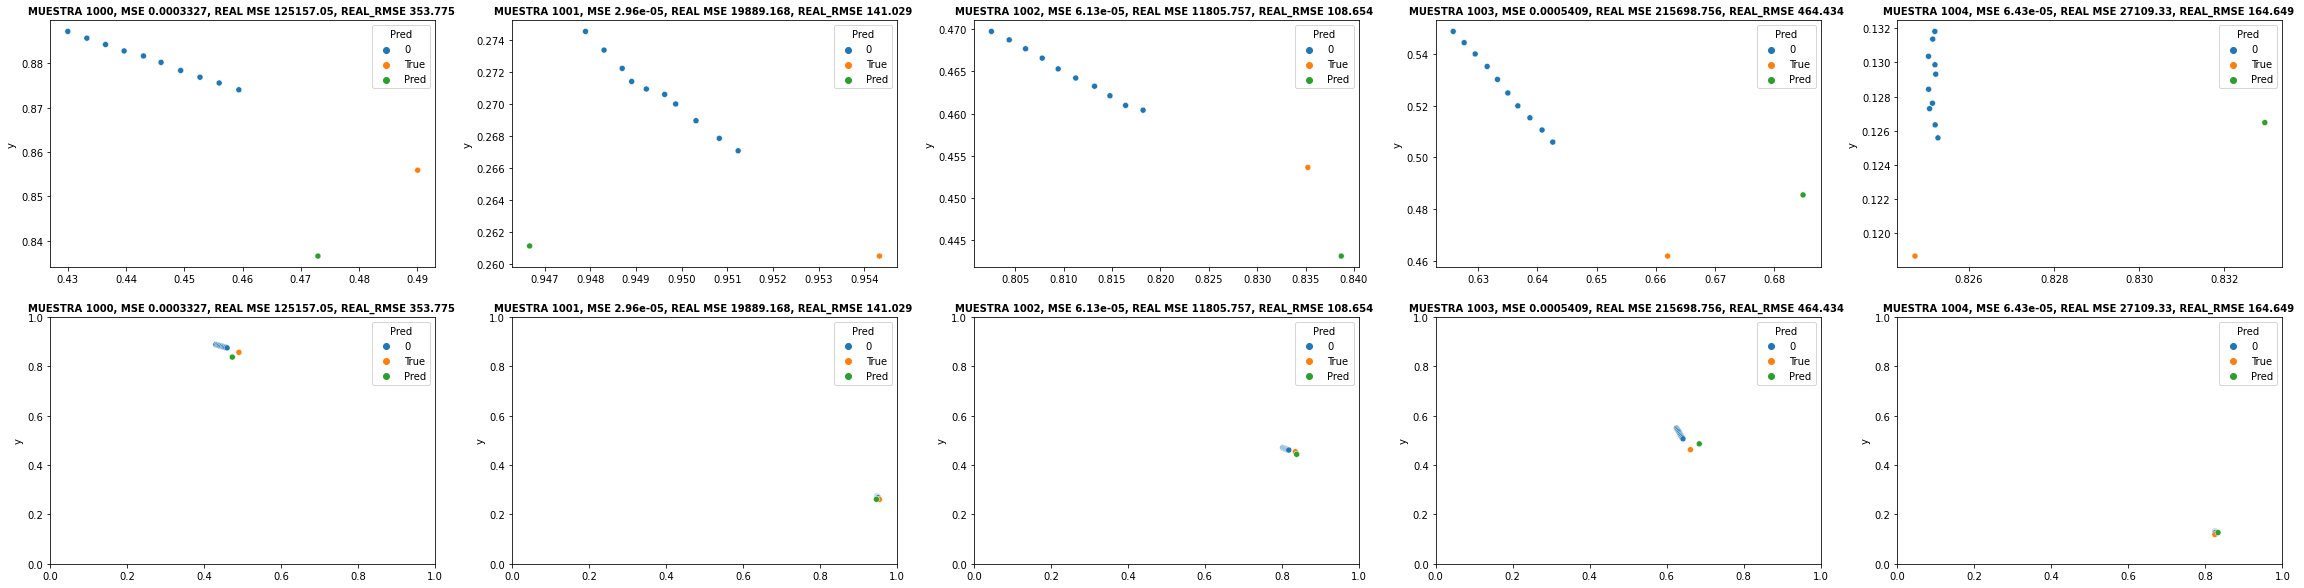

In [ ]:
plot_muestras(X_test,Y_test,Y_predict_rnn_test,since=1000,until = 1005)

Métricas TEST RNN

In [ ]:
mse_RNN = mean_squared_error(Y_test,Y_predict_rnn_test)
y_test_real = [Y_test[:,0]*range_X + min_x , Y_test[:,1]*range_Y + min_y]
y_real_pred = [Y_predict_rnn_test[:,0]*range_X + min_x , Y_predict_rnn_test[:,1]*range_Y + min_y]
Real_mse_RNN = mean_squared_error(y_test_real,y_real_pred)
Real_rmse_RNN = Real_mse_RNN**0.5
mse_RNN,Real_mse_RNN,  Real_rmse_RNN

(0.000115433047162712, 45995.38209277139, 214.46534007333537)

# CNN simple ( a modo de prueba antes del tuning )

In [ ]:
X_train_cnn = np.expand_dims(X_train,axis=3)
X_test_cnn = np.expand_dims(X_test,axis=3)
X_train_cnn.shape, X_test_cnn.shape


((6735, 10, 4, 1), (1684, 10, 4, 1))

In [ ]:
X_train_cnn_COMPLETE = np.expand_dims(X_train_COMPLETE,axis=3)
X_test_cnn_COMPLETE = np.expand_dims(X_test_COMPLETE,axis=3)
X_train_cnn_COMPLETE.shape, X_test_cnn_COMPLETE.shape

((133335, 10, 4, 1), (33334, 10, 4, 1))

In [ ]:


#Adam 0.01 10 1024 0.004593185195699334
from keras.layers import Conv2D
l_r = 0.01
batch = 1024
epoch = 20
cnn_units = 10

model_2 = keras.Sequential()



model_2.add(keras.layers.InputLayer(input_shape=(10,4,1)))


model_2.add(Conv2D(cnn_units, kernel_size= (3, 3), activation='relu', padding='same'))

# Capas fully connected

model_2.add(keras.layers.Flatten())

#FC1
#model_2.add(keras.layers.Dense(1024,kernel_regularizer=L1L2(L1,L2), activation='relu'))
#model_2.add(Dropout(do))

# Output
model_2.add(keras.layers.Dense(2))



In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 10, 4, 10)         100       
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 802       
Total params: 902
Trainable params: 902
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss1 = tf.keras.losses.MeanSquaredError()
loss2 = tf.keras.losses.MeanAbsoluteError()
#loss_2 = euclidian_distance_tf()
Opt = Adam1(lr_schedulee = lr_schedule(l_r),a=1)
model_2.compile(optimizer=Opt, loss=loss1)

In [ ]:
model_2.compile(optimizer=Opt,
                loss=loss1)
history_2 = model_2.fit(X_train_cnn, Y_train, epochs=epoch, batch_size=batch,callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)],
                    verbose = 1,validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 1s 35ms/step - loss: 0.3201 - val_loss: 0.0671
Epoch 2/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0388 - val_loss: 0.0192
Epoch 3/20
6/6 [==============================] - 0s 20ms/step - loss: 0.0204 - val_loss: 0.0146
Epoch 4/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0123 - val_loss: 0.0098
Epoch 5/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0103 - val_loss: 0.0084
Epoch 6/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0081 - val_loss: 0.0067
Epoch 7/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0068 - val_loss: 0.0060
Epoch 8/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 9/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 10/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 11/20
6/6 [============

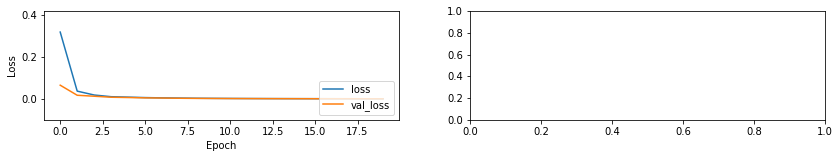

In [ ]:
plot(history = history_2)

In [ ]:
history_2.history['val_loss'][-1]

0.0023184707388281822

In [ ]:
Y_predict_cnn = model_2.predict(X_train_cnn)

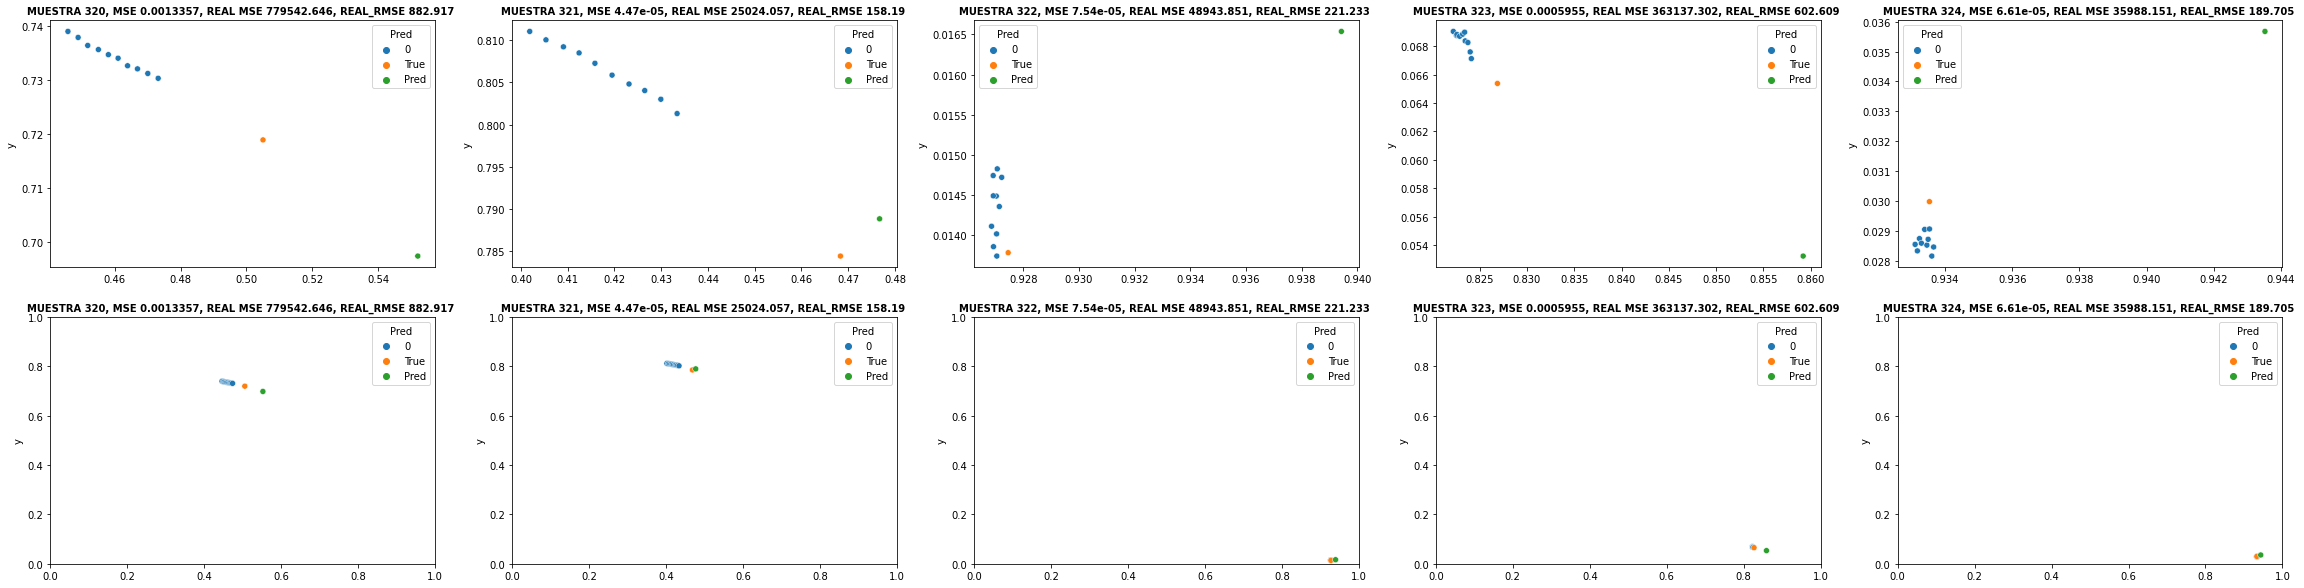

In [ ]:
plot_muestras(X_train,Y_train,Y_predict_cnn,since=320,until = 325)

# Hipermodelo CNN

In [ ]:
def CNN_builder(hp):  
  from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

  #Adam 0.01 0.0 0.001 0.0 32 0.656386944770528
  #Opciones de Hiperparámetros
  L_r = hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3])
  Opt = hp.Choice('Optimizer',['Adam'])#,'SGD'])
  units = hp.Choice('cnn_units',[10,20])



  model_2 = keras.Sequential()

  model_2.add(keras.layers.InputLayer(input_shape=(10,4,1)))

  model_2.add(Conv2D(cnn_units, kernel_size= (3, 3), activation='relu', padding='same'))

  # Capas fully connected

  model_2.add(keras.layers.Flatten())

  # Output
  model_2.add(keras.layers.Dense(2))

  if Opt == 'Adam': #Adam
    Optimizer = Adam1(lr_schedulee = lr_schedule(L_r),a=1)
  else: #SGD
    Optimizer = SGD(lr_schedulee= lr_schedule(L_r))
  
  model_2.compile(optimizer=Optimizer,
                  loss=loss1)
  return model_2

# Kt.engine.Tuner.tuner, CNN

In [ ]:
def hyperband():
   return kt.oracles.Hyperband(
    objective=kt.Objective("val_loss", direction="min"),
    max_epochs= 20,
    factor=10,
    hyperband_iterations=1,
    seed=None)  

def bayesian():
   return kt.oracles.BayesianOptimization(
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=20,
    seed = None)

def random():
   return kt.oracles.RandomSearch(
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=10,
    seed=None,
    hyperparameters=None,
    allow_new_entries=True,
    tune_new_entries=True,)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
class CVTuner(kt.engine.tuner.Tuner):

  def run_trial(self, trial, x, y, batch_size=32, epochs=1):
    cv = sklearn.model_selection.KFold(5,shuffle = True, random_state = 0)
    val_losses = []
    h = 0
    for train_indices, test_indices in cv.split(x):
        x_train, x_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
           
        model = self.hypermodel.build(trial.hyperparameters)

        model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 0)
        #y_pred = model.predict(x_test)
        loss = mean_squared_error(y_test,model.predict(x_test))
        K.clear_session()
        val_losses.append(loss)
        print("FOLD: {}, : val_loss: {}".format(h+1,loss))
        h+=1

    self.oracle.update_trial(trial.trial_id, {'val_loss': np.mean(val_losses)})
    self.save_model(trial.trial_id, model)
best_CNN = []

#with tf.device('cpu:0'):
for batch in [1024,2048,4096]:
  cnn_tuner = CVTuner(
  hypermodel= CNN_builder,
  oracle=hyperband(),
    directory='CNN_FINAL_{}'.format(batch+2),
    project_name = '1'
    )
  cnn_tuner.search(X_train_cnn, Y_train, batch_size=batch, epochs=20)
  best_CNN.append(cnn_tuner.get_best_hyperparameters(num_trials=1))


Trial 6 Complete [00h 00m 09s]
val_loss: 0.022507289963353532

Best val_loss So Far: 0.002644268538524588
Total elapsed time: 00h 00m 57s
INFO:tensorflow:Oracle triggered exit


Reentrenamiento para obtener mejor batchsize

In [ ]:
BATCH_CNN = [1024,2048,4096]
best_hps_cnn = RETRAINING_BATCH_SELECT(cnn_tuner, best_CNN,BATCH_CNN,X_train_cnn,Y_train)

In [ ]:
#CROSSVALIDATION PARA LOS 3 BATCHSIZES
d = len(best_hps_cnn)
for i in range(d-1,d-4,-1):
  print(best_hps_cnn[i][0][0].get('Optimizer'),
        best_hps_cnn[i][0][0].get('learning_rate'),
        best_hps_cnn[i][0][0].get('cnn_units'),
        best_hps_cnn[i][2],
        best_hps_cnn[i][1]

  )


Adam 0.01 10 1024 0.0041515723336488005
Adam 0.01 10 2048 0.011292948666960002
Adam 0.01 10 4096 0.01793226655572653


In [ ]:
best_hps_cnn_final = sorted(best_hps_cnn,reverse=False,key=lambda best_hps:best_hps[1])
best_hps_cnn_final

[([<keras_tuner.engine.hyperparameters.HyperParameters at 0x7fb734964a10>],
  0.0041515723336488005,
  1024),
 ([<keras_tuner.engine.hyperparameters.HyperParameters at 0x7fb7348e7210>],
  0.011292948666960002,
  2048),
 ([<keras_tuner.engine.hyperparameters.HyperParameters at 0x7fb734b73690>],
  0.01793226655572653,
  4096)]

Reentrenamiento del modelo final escogido para obtener mejor semilla y métricas de rendimiento promedio

In [ ]:
final_model, final_metrics = FINAL_MODEL(best_hps_cnn_final, cnn_tuner, X_train_cnn, Y_train,epoch = 20, c_v = 5)

Fold 1 iniciando
Epoch 1/20
6/6 [==============================] - 1s 36ms/step - loss: 0.1372 - val_loss: 0.0260
Epoch 2/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0271 - val_loss: 0.0189
Epoch 3/20
6/6 [==============================] - 0s 19ms/step - loss: 0.0153 - val_loss: 0.0134
Epoch 4/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0121 - val_loss: 0.0090
Epoch 5/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 6/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0075 - val_loss: 0.0063
Epoch 7/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 8/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 9/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 10/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 11/20


In [ ]:
print(final_model[0])
print(final_model[1])
print(final_model[2])
print(final_model[3])
print(final_model[4].shape)
print(final_model[5].shape)
for i in final_metrics:
  print( "{} : {}".format(i,final_metrics[i]))


0.00125916360411793
0.0012659112690016627
(1347, 10, 4, 1)
(1347, 2)
mean_train : 0.0006988933659158647
std_train : 0.0003063437631944218
mean_val : 0.0007013447990175337
std_val : 0.000298684624110619
mean_train_realMSE : 139491844.21729094
std_train_realMSE : 543417.666890853
mean_val_realMSE : 139311200.2183411
std_val_realMSE : 1892354.1775210837
mean_train_realRMSE : 11810.644188184358
std_train_realRMSE : 22.97993468300693
mean_val_realRMSE : 11802.742553005704
std_val_realRMSE : 80.4266486277652


Mejor semilla

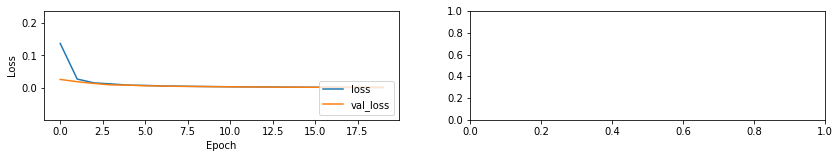

In [ ]:
cnn1_model = final_model[3]
history_2 = final_model[2]
#y_pred_rnn =predict(rnn1_model,final_model[5])
#K.clear_session()
plot(history = history_2)

In [ ]:
history_2.history['val_loss'][-1]

0.0012659112690016627

In [ ]:
Y_predict_cnn = cnn1_model.predict(X_train_cnn)

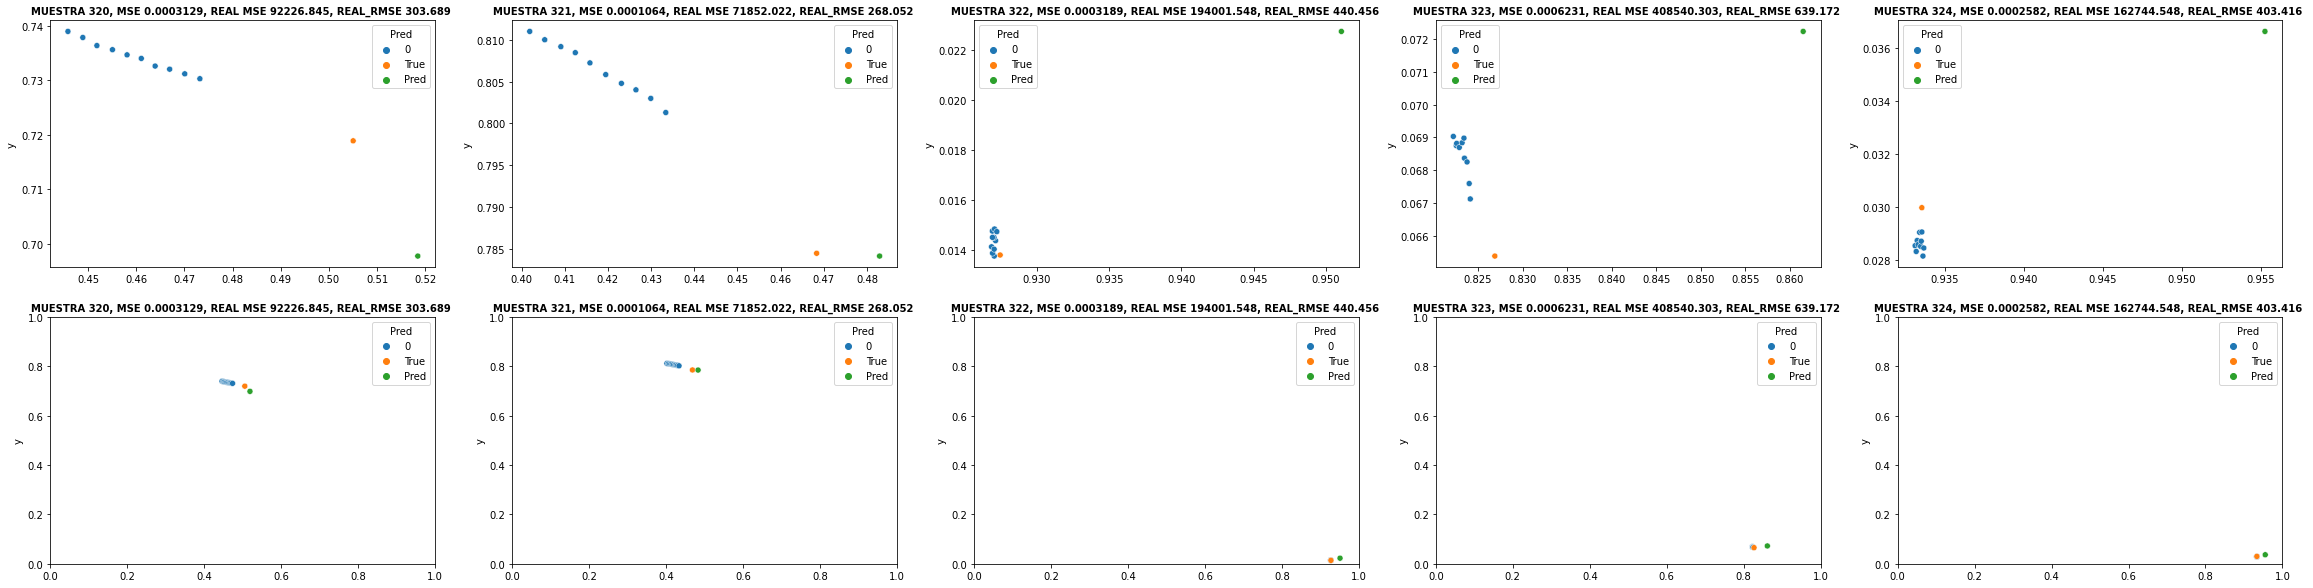

In [ ]:
plot_muestras(X_train,Y_train,Y_predict_cnn,since=320,until = 325)

#Test CNN

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Y_predict_cnn_test = cnn1_model.predict(X_test_cnn)

In [ ]:
mse_CNN = mean_squared_error(Y_test,Y_predict_cnn_test)
y_test_real_CNN = [Y_test[:,0]*range_X + min_x , Y_test[:,1]*range_Y + min_y]
y_real_pred_CNN = [Y_predict_cnn_test[:,0]*range_X + min_x , Y_predict_cnn_test[:,1]*range_Y + min_y]
Real_mse_CNN = mean_squared_error(y_test_real_CNN,y_real_pred_CNN)
Real_rmse_CNN = Real_mse_CNN**0.5
mse_CNN,Real_mse_CNN,  Real_rmse_CNN

(0.0012476511363294753, 693525.6417766724, 832.781869265099)

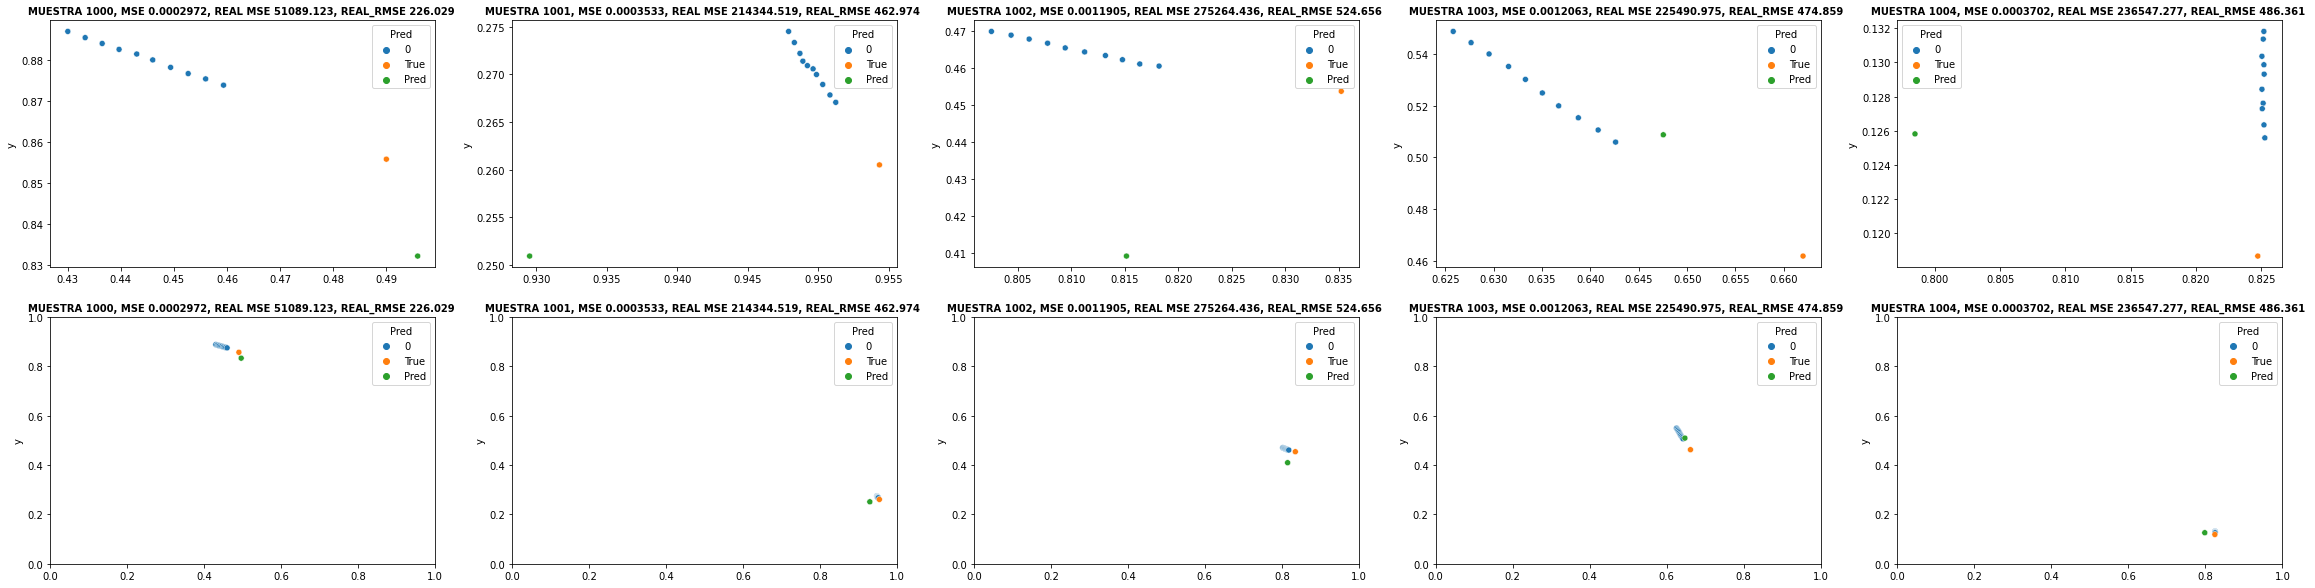

In [ ]:
plot_muestras(X_test,Y_test,Y_predict_cnn_test,since=1000,until = 1005)

# Entrenamiento final con DataSet al 100%

# RNN MODELO FINAL

In [ ]:
def RNN_MODEL():
  from tensorflow.keras import layers
  def lr_schedule(l_r):
    return tf.keras.optimizers.schedules.InverseTimeDecay(l_r, decay_steps=1*10, decay_rate=1)
  def SGD(lr_schedulee):
    return tf.keras.optimizers.SGD(lr_schedulee)
  def Adam1(lr_schedulee,a):
    return tf.keras.optimizers.Adam(lr_schedulee,clipnorm = a)
  time_steps = 10
  features = 4
  embedding_dim = 128
  hidden_units = 256
  l_r = 0.001

  inputs = keras.layers.Input(shape=(time_steps, features))    # <tf.Tensor 'Inputs:0' shape=(?, 10, 4) dtype=float32>
  embedding = keras.layers.Dense(embedding_dim)(inputs)                       # <tf.Tensor 'dense_1/add:0' shape=(?, 10, 128) dtype=float32>

  # Nos interesa que la red sea profunda, por lo que tomamos la salida en cada uno de los 10 pasos (return_sequences = True) para pasarsela a la siguiente capa.
  lstm_1 = keras.layers.LSTM(hidden_units, return_sequences=True, name='lstm_1')(embedding)

  # Conectamos el output anterior [None, 10, 256] a la entrada de la siguiente capa
  lstm_2_sequence, lstm_2_state_h, lstm_2_state_c = keras.layers.LSTM(hidden_units, return_sequences=True, return_state=True, name='lstm_2')(lstm_1)

  # Lo interesante, es que podemos hacer lo que nosotros queramos con este tensor ahora
  # Por ejemplo, vamos a tomar solo el ultimo output y los estados y ponerlos en un solo vector
  # OJO: Es muy importante que todas las operaciones sean capas de keras, sino el codigo no funcionara
  last_lstm_output = keras.layers.Lambda(lambda x: x[:, -1, :])(lstm_2_sequence)
  stacked_lstm_output = keras.layers.Concatenate()([last_lstm_output, lstm_2_state_h, lstm_2_state_c]) # <tf.Tensor 'Reshape:0' shape=(?, 768) dtype=float32>

  # Y ahora podemos continuar con lo que queramos
  output_layer_1 = keras.layers.Dense(128, activation='relu')(stacked_lstm_output)
  #output_layer_2 = keras.layers.Dense(64, activation=None)(output_layer_1)
  output_layer_3 = keras.layers.Dense(2, activation=None)(output_layer_1)

  model = keras.models.Model(inputs=inputs, outputs=output_layer_3)
  loss1 = tf.keras.losses.MeanSquaredError()
  loss2 = tf.keras.losses.MeanAbsoluteError()
  #loss_2 = euclidian_distance_tf()
  Opt = Adam1(lr_schedulee = lr_schedule(l_r), a = 1) #a = clipnorm
  model.compile(optimizer=Opt, loss=loss1)
  return model

  

In [ ]:
FINAL_MODEL_RNN = RNN_MODEL()
batch = 1024
epoch = 20

In [ ]:
FINAL_RNN_history = FINAL_MODEL_RNN.fit(X_train_COMPLETE, Y_train_COMPLETE, epochs=30, batch_size=batch,callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)],
                    verbose = 1, validation_split=0.2)

Epoch 1/30
105/105 [==============================] - 131s 1s/step - loss: 0.0090 - val_loss: 1.2172e-04
Epoch 2/30
105/105 [==============================] - 126s 1s/step - loss: 9.3612e-05 - val_loss: 8.1290e-05
Epoch 3/30
105/105 [==============================] - 126s 1s/step - loss: 7.5353e-05 - val_loss: 7.1873e-05
Epoch 4/30
105/105 [==============================] - 126s 1s/step - loss: 6.8268e-05 - val_loss: 6.6169e-05
Epoch 5/30
105/105 [==============================] - 126s 1s/step - loss: 6.3560e-05 - val_loss: 6.2278e-05
Epoch 6/30
105/105 [==============================] - 126s 1s/step - loss: 6.0107e-05 - val_loss: 5.9129e-05
Epoch 7/30
105/105 [==============================] - 126s 1s/step - loss: 5.7270e-05 - val_loss: 5.6581e-05
Epoch 8/30
105/105 [==============================] - 127s 1s/step - loss: 5.4874e-05 - val_loss: 5.4321e-05
Epoch 9/30
105/105 [==============================] - 126s 1s/step - loss: 5.2773e-05 - val_loss: 5.2290e-05
Epoch 10/30
105/105 [==

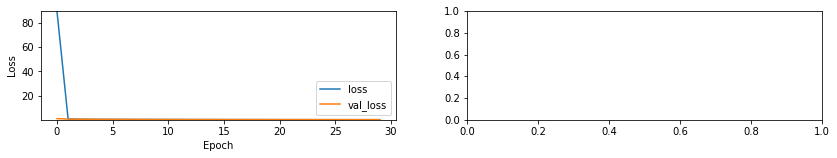

In [ ]:
plot(history = FINAL_RNN_history,scale = 10000)

In [ ]:
FINAL_RNN_history.history['loss'][-1]

3.362230563652702e-05

In [ ]:
Y_predict_RNN = FINAL_MODEL_RNN.predict(X_train_COMPLETE)

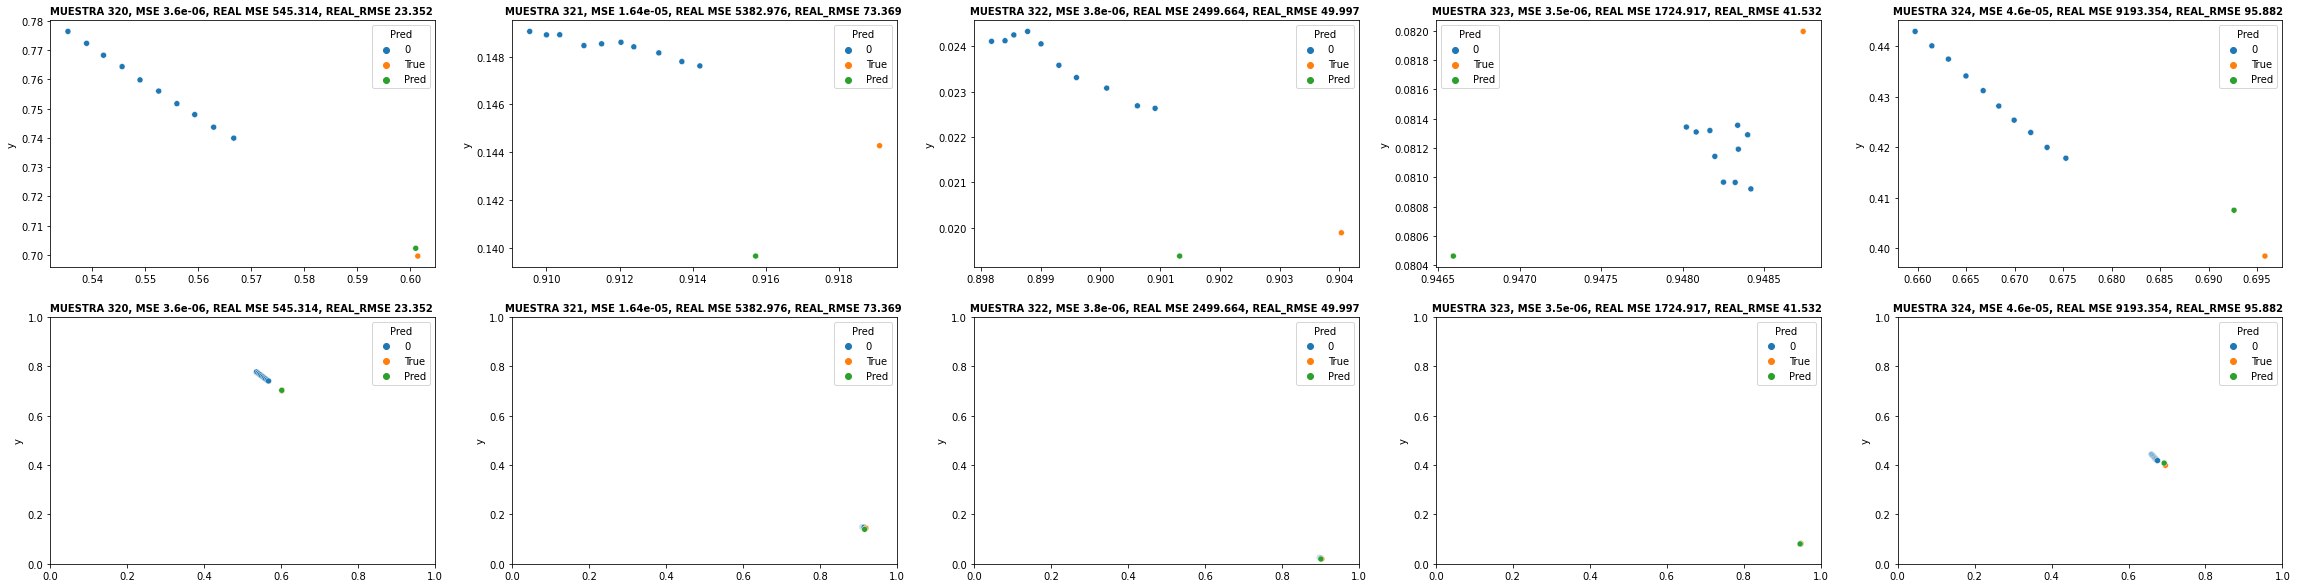

In [ ]:
plot_muestras(X_train_COMPLETE,Y_train_COMPLETE,Y_predict_RNN,since=320,until = 325) # Primera fila grafica muestras ajustadas al contexto dicha muestra, 
                                                                # Segunda fila grafica muestras ajustada al contexto general( entre 0 y 1 por la normalización)

#TEST MODELO FINAL RNN

TEST MODELO FINAL RNN

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Y_predict_RNN_test = FINAL_MODEL_RNN.predict(X_test_COMPLETE)

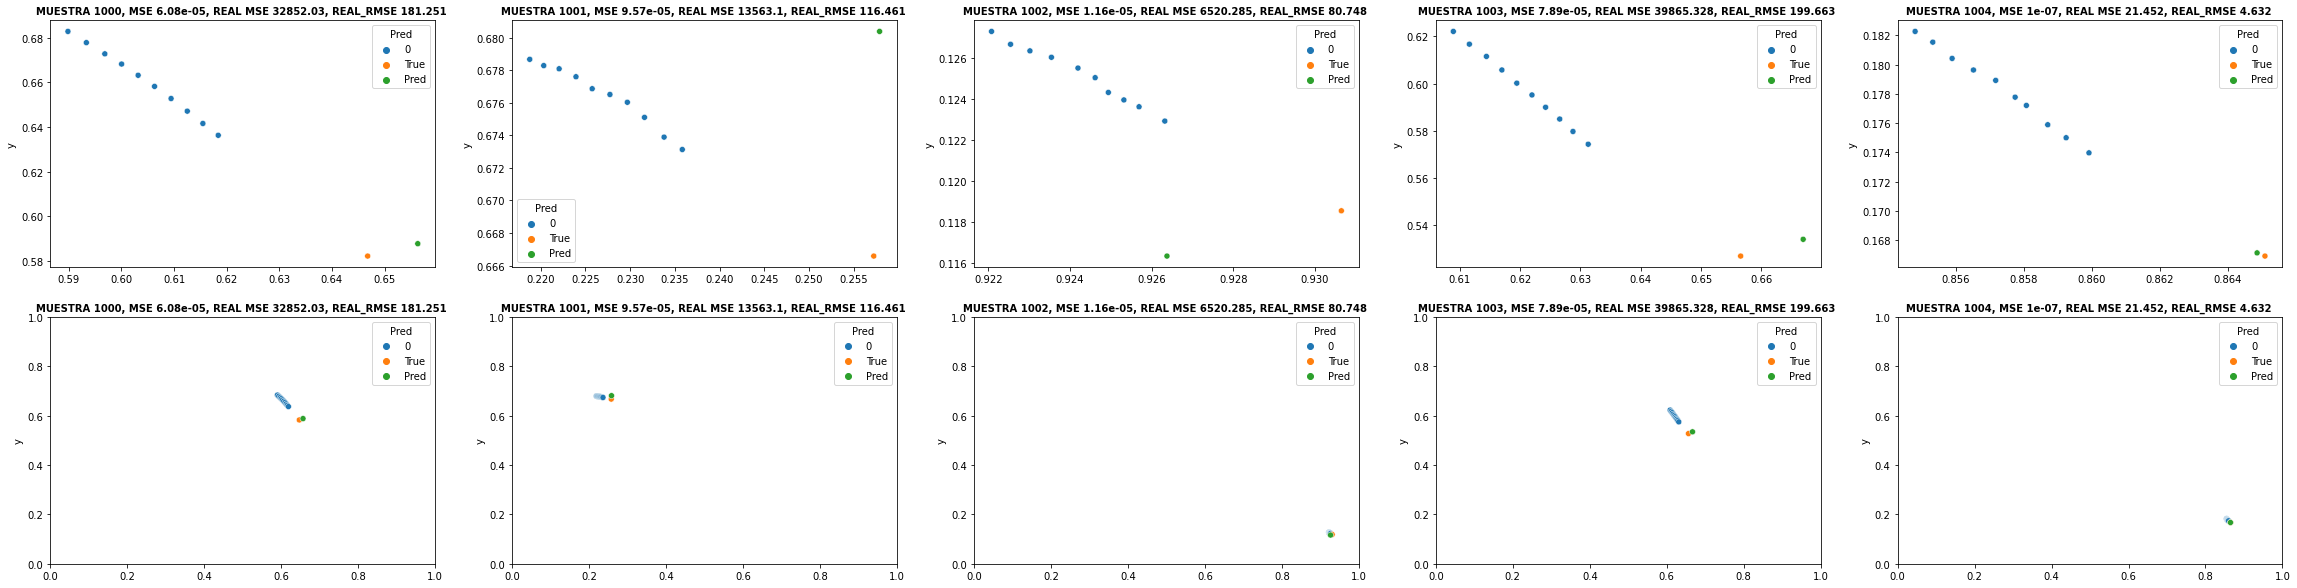

In [ ]:
plot_muestras(X_test_COMPLETE,Y_test_COMPLETE,Y_predict_RNN_test,since=1000,until = 1005)

Métricas TEST RNN

In [ ]:
mse_RNN_FINAL = mean_squared_error(Y_test_COMPLETE,Y_predict_RNN_test)
y_test_real_FINAL = [Y_test_COMPLETE[:,0]*range_X + min_x , Y_test_COMPLETE[:,1]*range_Y + min_y]
y_real_pred_FINAL = [Y_predict_RNN_test[:,0]*range_X + min_x , Y_predict_RNN_test[:,1]*range_Y + min_y]
Real_mse_RNN_FINAL = mean_squared_error(y_test_real_FINAL,y_real_pred_FINAL)
Real_rmse_RNN_FINAL = Real_mse_RNN_FINAL**0.5
mse_RNN_FINAL,Real_mse_RNN_FINAL,  Real_rmse_RNN_FINAL

(3.353753687839767e-05, 10196.909261452363, 100.97974678841477)

# CNN MODELO FINAL

In [ ]:
X_train_cnn = np.expand_dims(X_train,axis=3)
X_test_cnn = np.expand_dims(X_test,axis=3)
X_train_cnn.shape, X_test_cnn.shape


((6735, 10, 4, 1), (1684, 10, 4, 1))

In [ ]:
X_train_cnn_COMPLETE = np.expand_dims(X_train_COMPLETE,axis=3)
X_test_cnn_COMPLETE = np.expand_dims(X_test_COMPLETE,axis=3)
X_train_cnn_COMPLETE.shape, X_test_cnn_COMPLETE.shape

((133335, 10, 4, 1), (33334, 10, 4, 1))

In [ ]:
def CNN_MODEL():  
  #Adam 0.01 10 1024 0.004593185195699334
  from keras.layers import Conv2D

  from tensorflow.keras import layers
  
  def lr_schedule(l_r):
    return tf.keras.optimizers.schedules.InverseTimeDecay(l_r, decay_steps=1*10, decay_rate=1)
  def SGD(lr_schedulee):
    return tf.keras.optimizers.SGD(lr_schedulee)
  def Adam1(lr_schedulee,a):
    return tf.keras.optimizers.Adam(lr_schedulee,clipnorm = a)

  l_r = 0.01
  cnn_units = 10

  model_2 = keras.Sequential()



  model_2.add(keras.layers.InputLayer(input_shape=(10,4,1)))


  model_2.add(Conv2D(cnn_units, kernel_size= (3, 3), activation='relu', padding='same'))

  # Capas fully connected

  model_2.add(keras.layers.Flatten())

  #FC1
  #model_2.add(keras.layers.Dense(1024,kernel_regularizer=L1L2(L1,L2), activation='relu'))
  #model_2.add(Dropout(do))

  # Output
  model_2.add(keras.layers.Dense(2))

  loss1 = tf.keras.losses.MeanSquaredError()
  loss2 = tf.keras.losses.MeanAbsoluteError()
  #loss_2 = euclidian_distance_tf()
  Opt = Adam1(lr_schedulee = lr_schedule(l_r),a=1)
  model_2.compile(optimizer=Opt, loss=loss1)
  return model_2

In [ ]:
batch = 1024
epoch = 30
FINAL_CNN_MODEL = CNN_MODEL()
FINAL_CNN_history= FINAL_CNN_MODEL.fit(X_train_cnn_COMPLETE, Y_train_COMPLETE, epochs=epoch, batch_size=batch,callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)],
                    verbose = 1,validation_split=0.2)

Epoch 1/30
105/105 [==============================] - 2s 15ms/step - loss: 0.0100 - val_loss: 9.6277e-04
Epoch 2/30
105/105 [==============================] - 1s 14ms/step - loss: 7.2140e-04 - val_loss: 5.8474e-04
Epoch 3/30
105/105 [==============================] - 1s 14ms/step - loss: 5.0349e-04 - val_loss: 4.5088e-04
Epoch 4/30
105/105 [==============================] - 1s 14ms/step - loss: 4.0083e-04 - val_loss: 3.7003e-04
Epoch 5/30
105/105 [==============================] - 1s 14ms/step - loss: 3.3431e-04 - val_loss: 3.1525e-04
Epoch 6/30
105/105 [==============================] - 1s 14ms/step - loss: 2.8788e-04 - val_loss: 2.7642e-04
Epoch 7/30
105/105 [==============================] - 1s 14ms/step - loss: 2.5363e-04 - val_loss: 2.4495e-04
Epoch 8/30
105/105 [==============================] - 1s 14ms/step - loss: 2.2563e-04 - val_loss: 2.2036e-04
Epoch 9/30
105/105 [==============================] - 1s 13ms/step - loss: 2.0519e-04 - val_loss: 2.0262e-04
Epoch 10/30
105/105 [==

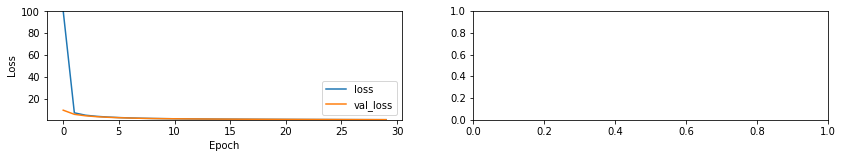

In [ ]:
plot(history = FINAL_CNN_history,scale = 10000)

In [ ]:
FINAL_CNN_history.history['loss'][-1]

9.387845057062805e-05

In [ ]:
Y_predict_CNN = FINAL_CNN_MODEL.predict(X_train_cnn_COMPLETE)

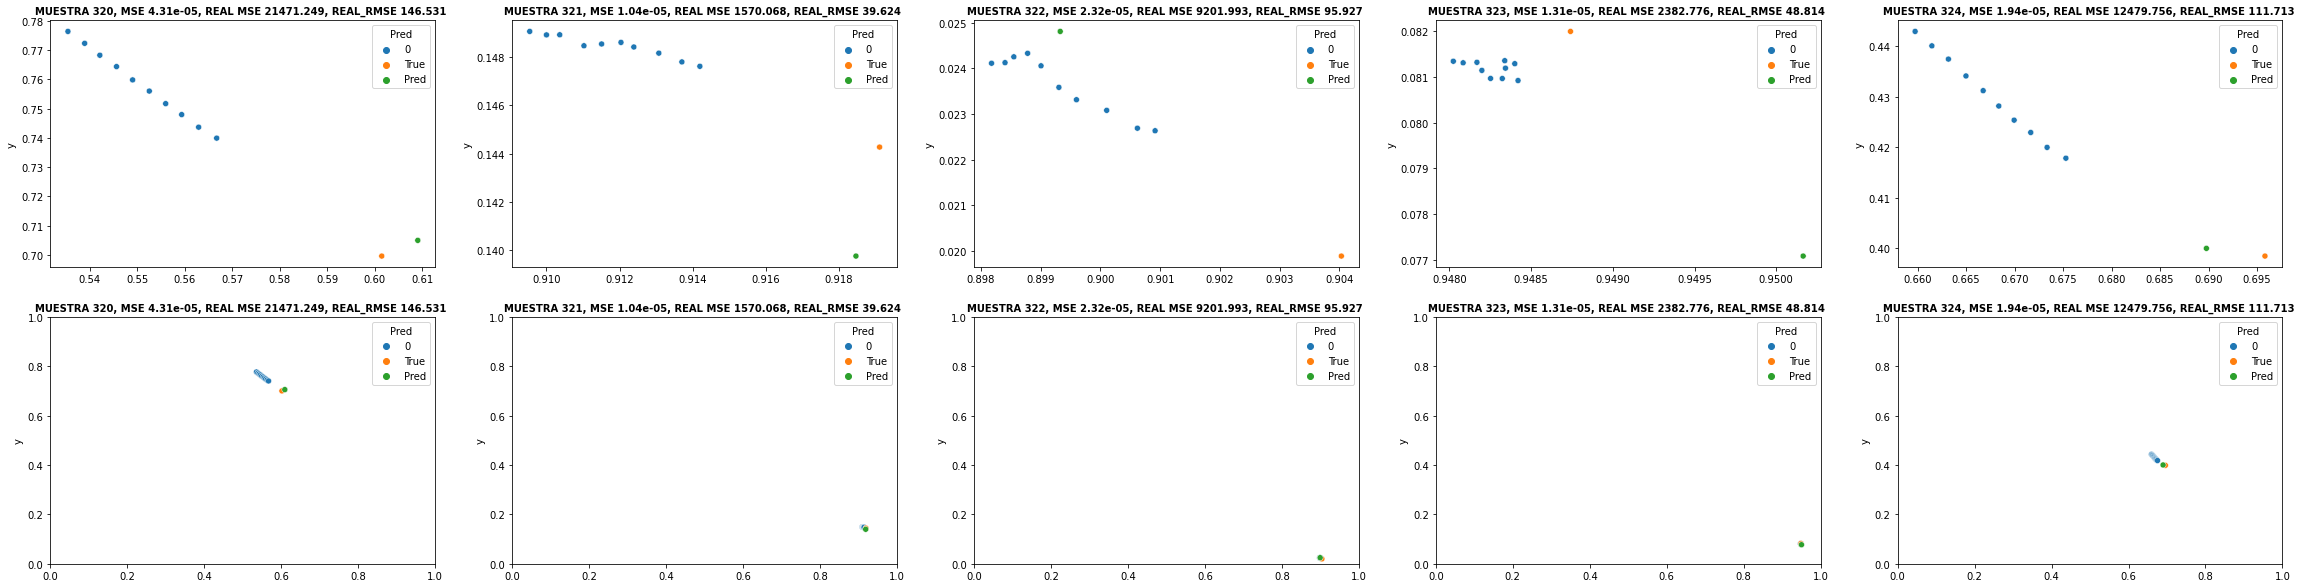

In [ ]:
plot_muestras(X_train_COMPLETE,Y_train_COMPLETE,Y_predict_CNN,since=320,until = 325) # Primera fila grafica muestras ajustadas al contexto dicha muestra, 
                                                                # Segunda fila grafica muestras ajustada al contexto general( entre 0 y 1 por la normalización)

# TEST MODELO FINAL CNN

TEST MODELO FINAL CNN

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Y_predict_CNN_test = FINAL_CNN_MODEL.predict(X_test_cnn_COMPLETE)

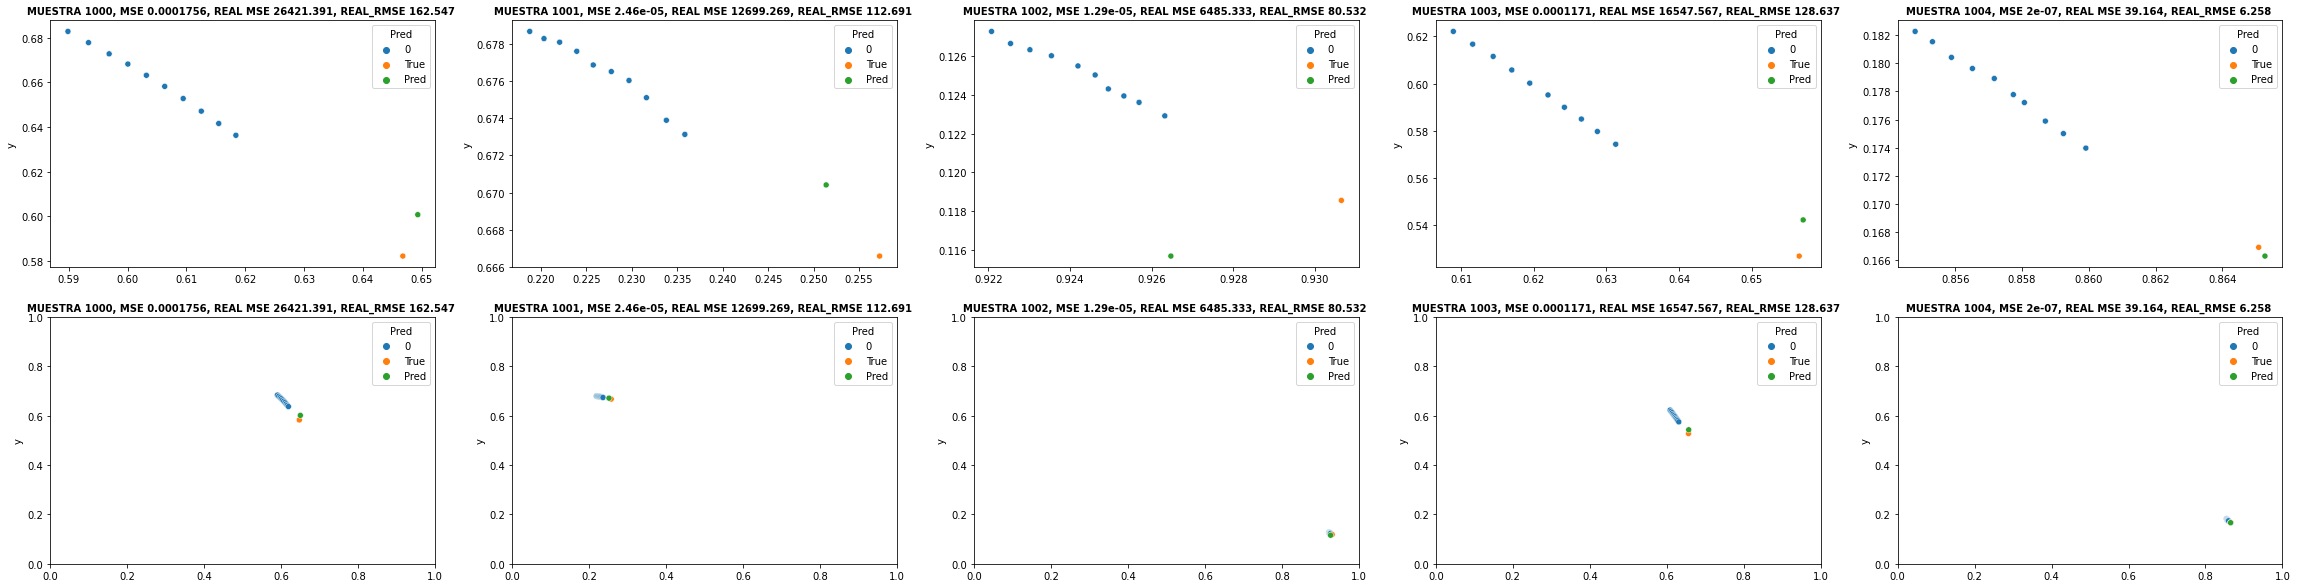

In [ ]:
plot_muestras(X_test_COMPLETE,Y_test_COMPLETE,Y_predict_CNN_test,since=1000,until = 1005)

Métricas TEST CNN

In [ ]:
mse_CNN_FINAL = mean_squared_error(Y_test_COMPLETE,Y_predict_CNN_test)
y_test_real_FINAL_CNN = [Y_test_COMPLETE[:,0]*range_X + min_x , Y_test_COMPLETE[:,1]*range_Y + min_y]
y_real_pred_FINAL_CNN = [Y_predict_CNN_test[:,0]*range_X + min_x , Y_predict_CNN_test[:,1]*range_Y + min_y]
Real_mse_CNN_FINAL = mean_squared_error(y_test_real_FINAL_CNN,y_real_pred_FINAL_CNN)
Real_rmse_CNN_FINAL = Real_mse_CNN_FINAL**0.5
mse_CNN_FINAL,Real_mse_CNN_FINAL,  Real_rmse_CNN_FINAL

(9.39556331091382e-05, 39195.27901742691, 197.9779760918545)

# PREGUNTAS

In [ ]:
# Como normalizar los datos...
# hypertuning , que parametros hypertunear ...
# Crear funcion de perdida distancia euclideana ...
# Se incluye Embeding en este problema...
# Tiempo de ejecución del entrenamiento ...

# RNN MODELO FINAL 2

In [ ]:
def RNN_MODEL():
  from tensorflow.keras import layers
  def lr_schedule(l_r):
    return tf.keras.optimizers.schedules.InverseTimeDecay(l_r, decay_steps=1*10, decay_rate=1)
  def SGD(lr_schedulee):
    return tf.keras.optimizers.SGD(lr_schedulee)
  def Adam1(lr_schedulee,a):
    return tf.keras.optimizers.Adam(lr_schedulee,clipnorm = a)
  time_steps = 10
  features = 4
  embedding_dim = 256
  hidden_units = 256
  l_r = 0.001
  #Adam 0.001 256 2 1 256 1024 0.001427986507769674
  inputs = keras.layers.Input(shape=(time_steps, features))    # <tf.Tensor 'Inputs:0' shape=(?, 10, 4) dtype=float32>
  embedding = keras.layers.Dense(embedding_dim)(inputs)                       # <tf.Tensor 'dense_1/add:0' shape=(?, 10, 128) dtype=float32>

  # Nos interesa que la red sea profunda, por lo que tomamos la salida en cada uno de los 10 pasos (return_sequences = True) para pasarsela a la siguiente capa.
  lstm_1 = keras.layers.LSTM(hidden_units, return_sequences=True, name='lstm_1')(embedding)

  # Conectamos el output anterior [None, 10, 256] a la entrada de la siguiente capa
  lstm_2_sequence, lstm_2_state_h, lstm_2_state_c = keras.layers.LSTM(hidden_units, return_sequences=True, return_state=True, name='lstm_2')(lstm_1)

  # Lo interesante, es que podemos hacer lo que nosotros queramos con este tensor ahora
  # Por ejemplo, vamos a tomar solo el ultimo output y los estados y ponerlos en un solo vector
  # OJO: Es muy importante que todas las operaciones sean capas de keras, sino el codigo no funcionara
  last_lstm_output = keras.layers.Lambda(lambda x: x[:, -1, :])(lstm_2_sequence)
  stacked_lstm_output = keras.layers.Concatenate()([last_lstm_output, lstm_2_state_h, lstm_2_state_c]) # <tf.Tensor 'Reshape:0' shape=(?, 768) dtype=float32>

  # Y ahora podemos continuar con lo que queramos
  output_layer_1 = keras.layers.Dense(128, activation='relu')(stacked_lstm_output)
  #output_layer_2 = keras.layers.Dense(64, activation=None)(output_layer_1)
  output_layer_3 = keras.layers.Dense(2, activation=None)(output_layer_1)

  model = keras.models.Model(inputs=inputs, outputs=output_layer_3)
  loss1 = tf.keras.losses.MeanSquaredError()
  loss2 = tf.keras.losses.MeanAbsoluteError()
  #loss_2 = euclidian_distance_tf()
  Opt = Adam1(lr_schedulee = lr_schedule(l_r), a = 1) #a = clipnorm
  model.compile(optimizer=Opt, loss=loss1)
  return model

  

In [ ]:
FINAL_MODEL_RNN = RNN_MODEL()
batch = 1024
epoch = 20

In [ ]:
FINAL_RNN_history = FINAL_MODEL_RNN.fit(X_train_COMPLETE, Y_train_COMPLETE, epochs=30, batch_size=batch,callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)],
                    verbose = 1, validation_split=0.2)

Epoch 1/30
105/105 [==============================] - 167s 2s/step - loss: 0.0085 - val_loss: 1.4411e-04
Epoch 2/30
105/105 [==============================] - 154s 1s/step - loss: 1.1105e-04 - val_loss: 9.3297e-05
Epoch 3/30
105/105 [==============================] - 156s 1s/step - loss: 8.3146e-05 - val_loss: 7.7538e-05
Epoch 4/30
105/105 [==============================] - 152s 1s/step - loss: 7.1579e-05 - val_loss: 6.8952e-05
Epoch 5/30
105/105 [==============================] - 152s 1s/step - loss: 6.4628e-05 - val_loss: 6.3192e-05
Epoch 6/30
105/105 [==============================] - 153s 1s/step - loss: 5.9613e-05 - val_loss: 5.8676e-05
Epoch 7/30
105/105 [==============================] - 157s 2s/step - loss: 5.5702e-05 - val_loss: 5.5118e-05
Epoch 8/30
105/105 [==============================] - 158s 2s/step - loss: 5.2420e-05 - val_loss: 5.2066e-05
Epoch 9/30
105/105 [==============================] - 157s 1s/step - loss: 4.9629e-05 - val_loss: 4.9395e-05
Epoch 10/30
105/105 [==

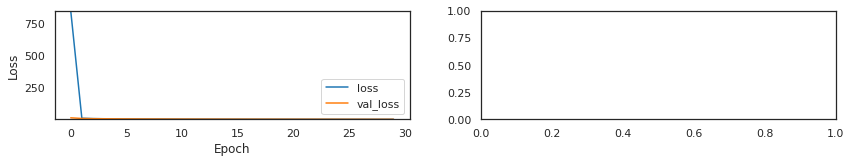

In [ ]:
plot(history = FINAL_RNN_history,scale = 100000)

In [ ]:
FINAL_RNN_history.history['loss'][-1]

2.9118496968294494e-05

In [ ]:
Y_predict_RNN = FINAL_MODEL_RNN.predict(X_train_COMPLETE)

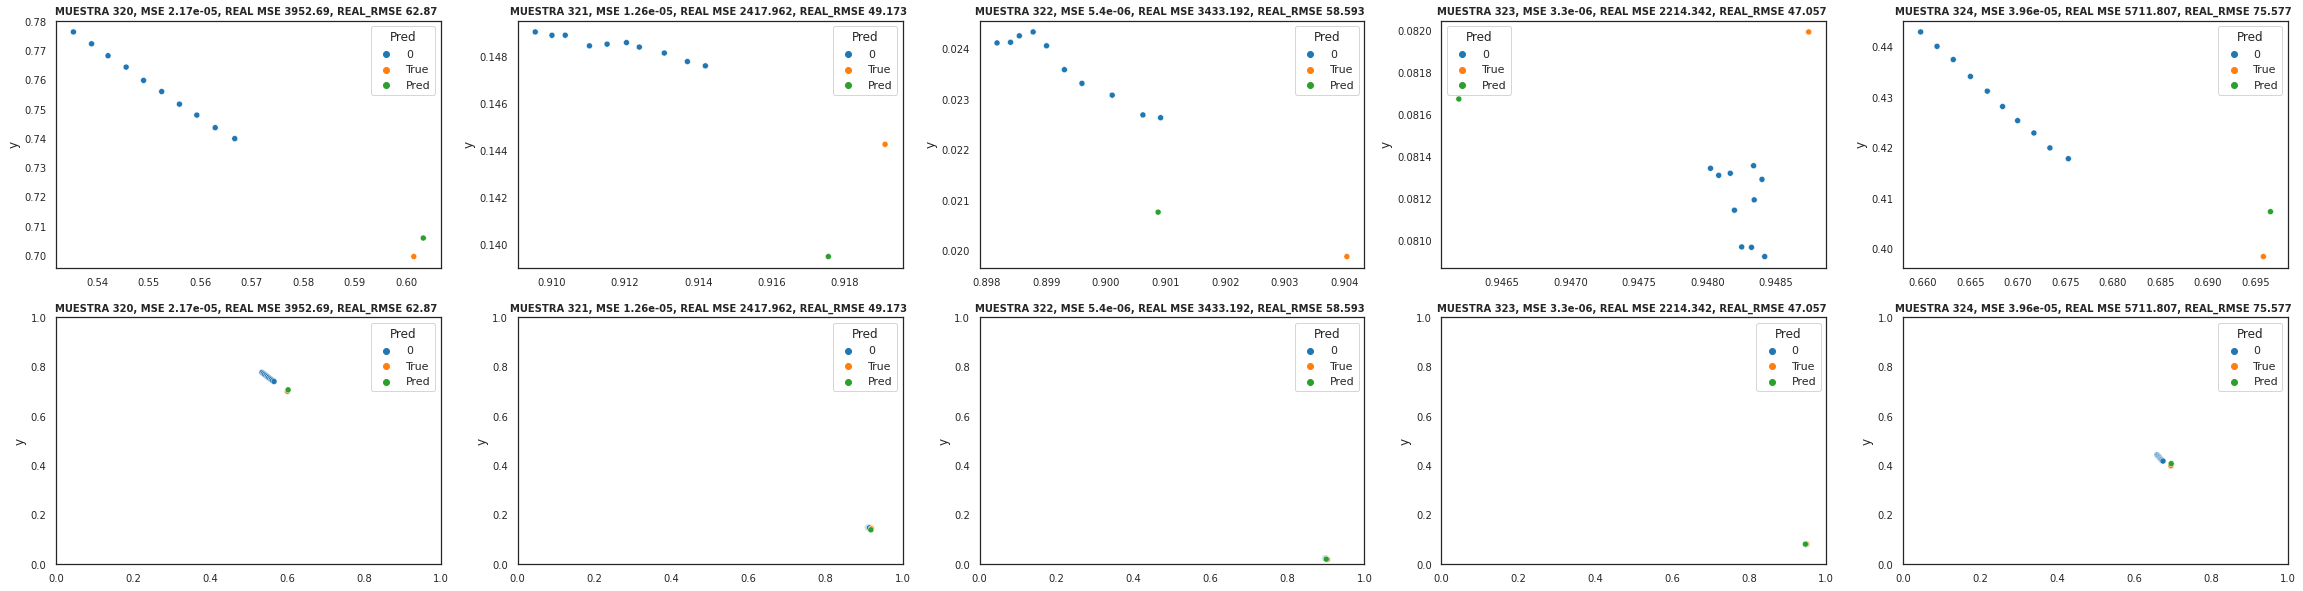

In [ ]:
plot_muestras(X_train_COMPLETE,Y_train_COMPLETE,Y_predict_RNN,since=320,until = 325) # Primera fila grafica muestras ajustadas al contexto dicha muestra, 
                                                                # Segunda fila grafica muestras ajustada al contexto general( entre 0 y 1 por la normalización)

#TEST MODELO FINAL RNN

TEST MODELO FINAL RNN

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Y_predict_RNN_test = FINAL_MODEL_RNN.predict(X_test_COMPLETE)

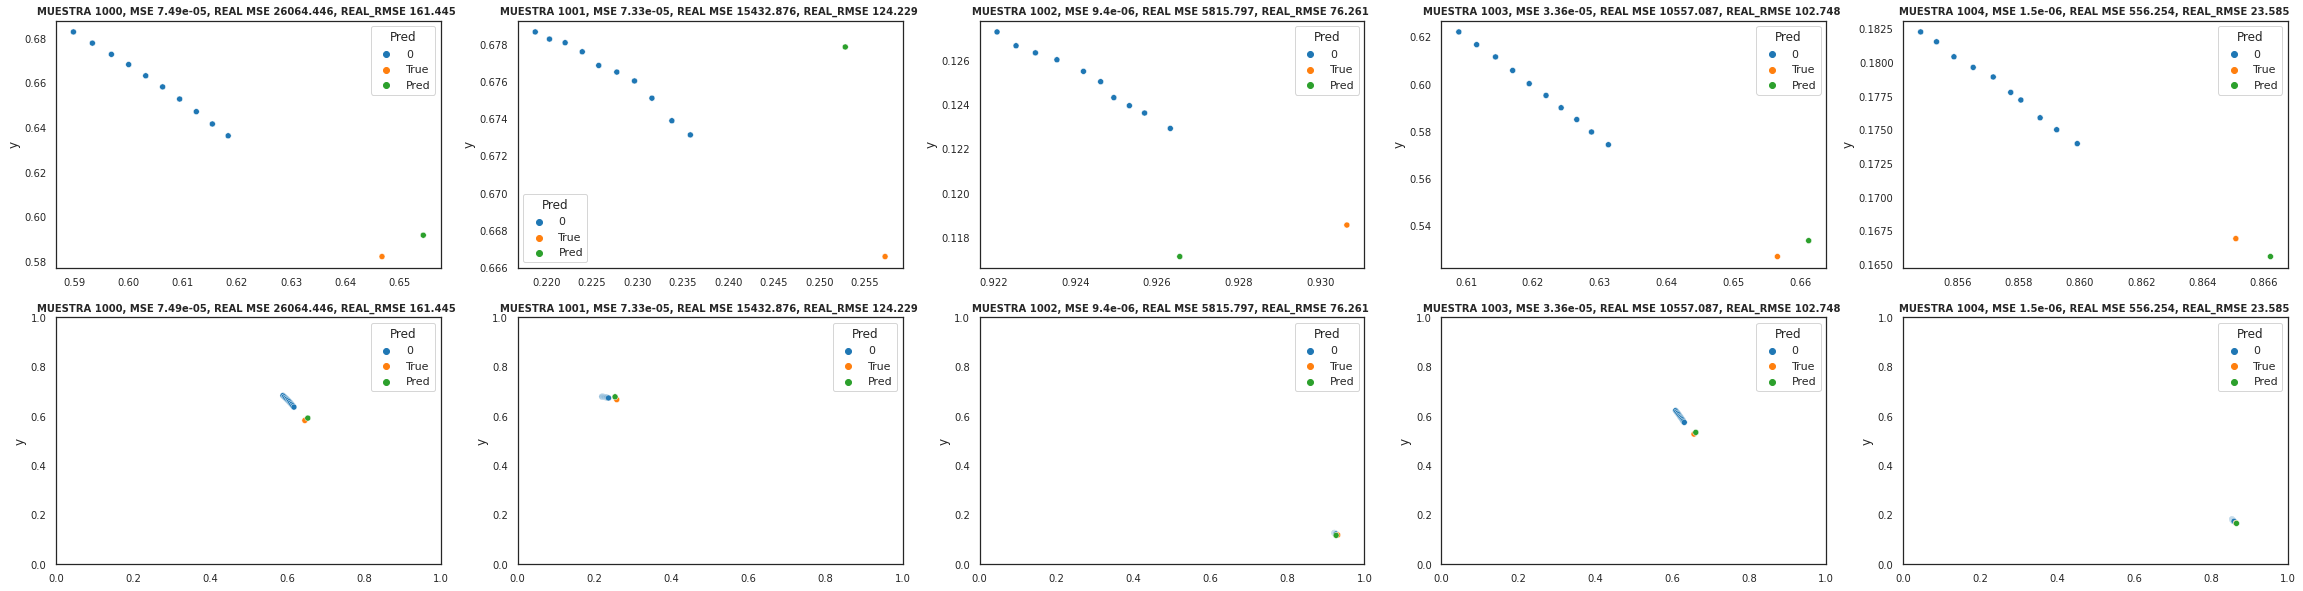

In [ ]:
plot_muestras(X_test_COMPLETE,Y_test_COMPLETE,Y_predict_RNN_test,since=1000,until = 1005)

Métricas TEST RNN

In [ ]:
mse_RNN_FINAL = mean_squared_error(Y_test_COMPLETE,Y_predict_RNN_test)
y_test_real_FINAL = [Y_test_COMPLETE[:,0]*range_X + min_x , Y_test_COMPLETE[:,1]*range_Y + min_y]
y_real_pred_FINAL = [Y_predict_RNN_test[:,0]*range_X + min_x , Y_predict_RNN_test[:,1]*range_Y + min_y]
Real_mse_RNN_FINAL = mean_squared_error(y_test_real_FINAL,y_real_pred_FINAL)
Real_rmse_RNN_FINAL = Real_mse_RNN_FINAL**0.5
mse_RNN_FINAL,Real_mse_RNN_FINAL,  Real_rmse_RNN_FINAL

(2.92171772864372e-05, 8912.146551492147, 94.40416596470808)